# Банки — Сегментация пользователей по потреблению

## Материалы:
* [Презентация]:https://disk.yandex.ru/d/7SWPrNcfnR69vA
* [Дашборд]: https://public.tableau.com/views/Finalprojectdashboard_16884892579270/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

## Определение задачи и краткое описание процесса исследования

**Задача данного исследования:** определение новых актуальных сегментов, на которые можно разделить действующих клиентов банка. 

**Дополнительная задача:** проверить отток клиентов из сформированных сегментов для выявления причин, почему это происходит.

**Обоснование необходимости исследования:** аналогичное исследование проводилось примерно 2 года назад, с тех пор структура клиентов поменялась, а их отток в последнее время усилился.

**Заказчик исследования:** отдел маркетинга банка. Полученные результаты о сегментации клиентов банка предполагается использовать для изменения стратегии предложения клиентам банка его продуктов.

**Цель исследования:** определение и выделение новых актуальных сегментов клиентов банка таким образом, чтобы изменение банковских продуктов приводило к уменьшению оттока клиентов.

Краткое описание процесса исследования:
- Загрузка и обзор данных
- Предобработка данных:
    - Исследование пропущенных значений;
    - Исследование соответствия типов данных и их изменение;
    - Проверка корректности наименований колонок и их переименование (при необходимости);
    - Исследование дубликатов и их удаление (при наличии и необходимости);
    - Замена, заполнение пропущенных значений (при необходимости);
    - Преобразование столбца с данными и поле клиентов в булев тип;
    - Преобразование столбца с данными о городах в булев тип.
- Исследовательский анализ данных:
    - Общее кол-во уникальных клиентов;
    - Распределение клиентов по городам + доли клиентов из каждого города в общем кол-ве клиентов;
    - Присвоение определенной категории в зависимости от кредитного рейтинга. Построение гисторграммы и анализ получившегося результата;
    - Средняя и медианная зарплата по городам. Анализ выбросов;
    - Изучение баланса денежных средств на счетах клиентов. Анализ выбросов;
    - Изучение возрастного диапазона клиентов банка. Разбитие клиентов по возрастным категориям. Анализ выбросов;
    - Сводная таблица: возраст/пол - кредитный рейтинг;
    - Матрица корреляций;
    - Определение, из каких категорий клиентов происходит самый большой отток: зависимость оттока от кредитного рейтинга, заработной платы, возраста, пола (вот тут может быть статистическая гипотеза о равенстве долей), города;
    - Продукты, используемые клиентами из "зоны риска" (с низким скорингом);
- Разделение пользователей на основе данных о количестве потребляемых продуктов на категории ;
- Исследование отличительных черт получившихся групп, анализ причин оттока клиентов из сформированных сегментов;
- Проверка статистических гипотез;
- Выводы по результатам исследования и рекомендации для заказчика.

## Загрузка и обзор данных

In [1]:
# Импортируем библиотеки, необходимые для исследования
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
import math as mth

In [2]:
# Добавим код для предотвращения появления предупреждений
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Блок кода для расположения всех графиков по центру
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
# Запишем наши данные в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

# Сохраним наши данные в переменной в первоначальном виде, чтобы была возможность обратиться к ним
raw_data = data

In [5]:
# Ознакомимся с данными
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


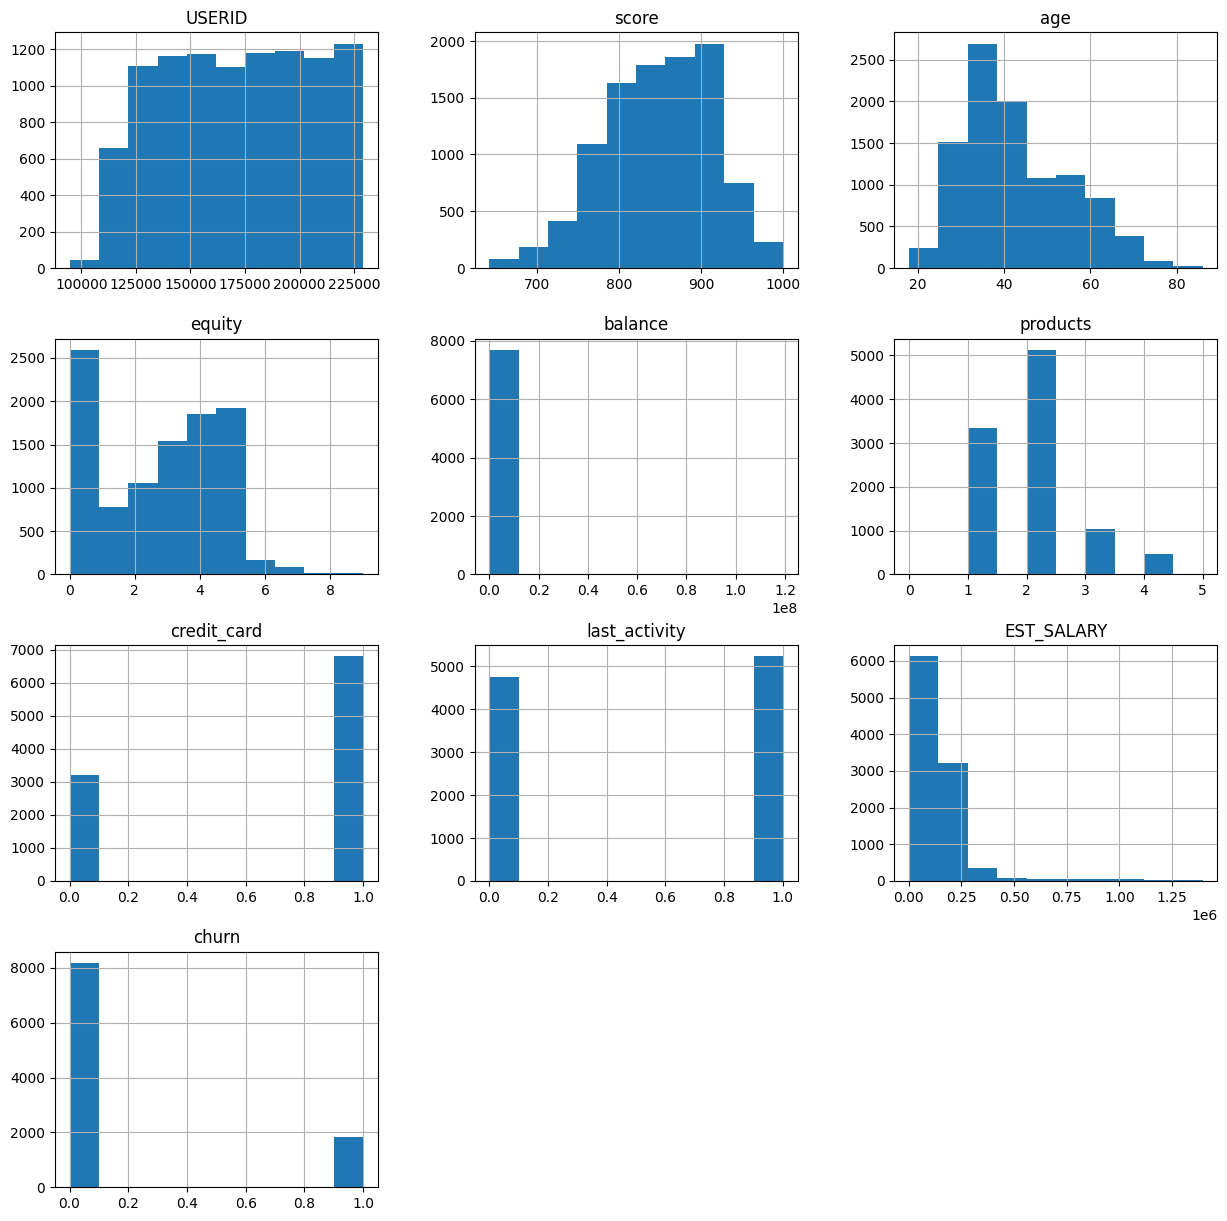

In [6]:
# Сделаем общий обзор данных
data.hist(figsize = (15, 15));

**Краткие выводы:**
- предположительное кол-во клиентов - 10 000 человек;
- пропуски: небольшое кол-во в данных с возрастом - такие строки мы просто удалим. Но в поле "Баланс на счете" пропусков очень много - надо будет подумать, что с этим делать;
- основная масса клиентов со скорингом 800 - 900+, т.е. достаточно высоким уровнем надежности;
- возраст большинства клиентов находится в диапазоне 25-45 лет;
- чуть больше 25% клиентов не имеют никаких объектов в собственности;
- в значениях balance (баланс на счете) есть какие-то аномалии, нужно будет проверить это и выбросить лишние данные;
- у 80-85% клиентов один или два продукта банка;
- почти у 70% клиентов есть кредитная карта банка;
- более 45% клиентов почему-то не активные - необходимо будет это выяснить в процессе исследовательского анализа;
- по заработным платам данные похожи на объективные, но их все равно необходимо будет проверить на предмет выбросов;
- доля ушедших клиентов составляет чуть менее 20%.

## Предобработка данных

#### Исследование пропущенных значений

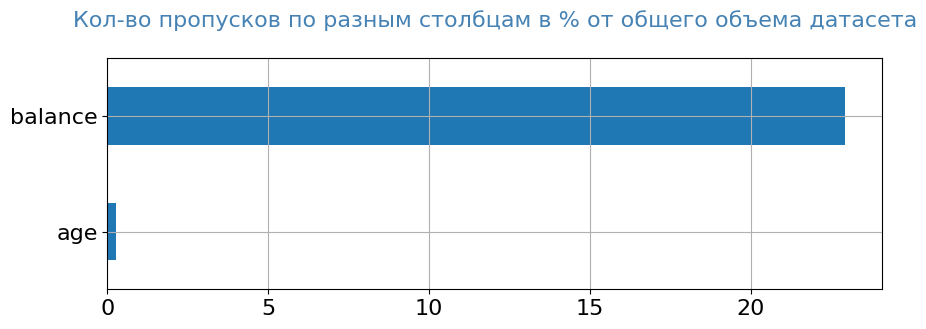

In [7]:
# Выведем все пропущенные значения, посмотрим на их долю в общем объеме датасета
(
(data.isna().mean()*100) 
            .to_frame() 
            .rename(columns = {0:'space'}) 
            .query('space > 0')           
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (10,3), rot = 0,\
                  legend = False, grid = True, fontsize = 16) 
            .set_title('Кол-во пропусков по разным столбцам в % от общего объема датасета' + "\n",\
                       fontsize = 16, color = 'SteelBlue')    
);

In [8]:
# Исключим из датасета клиентов без указанного возраста
data = data.query('age.notnull()').reset_index(drop = True).sort_values(by = 'USERID')

In [9]:
# Посмотрим на клиентов, у которых отсутствует значение баланса и которые ушли из банка 
data.query('balance.isna() and churn == 1')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8172,116284,743.0,Ярославль,М,48.0,0,NaN,1,1,1,634457.21,1
9208,116750,776.0,Ярославль,М,46.0,0,NaN,1,1,0,540423.84,1
3014,123230,980.0,Рыбинск,Ж,53.0,0,NaN,1,1,1,327646.02,1
5571,136508,739.0,Рыбинск,М,49.0,0,NaN,2,1,1,280945.17,1
1272,136567,961.0,Ярославль,М,31.0,0,NaN,1,1,0,1015386.14,1
7561,144559,748.0,Ярославль,М,45.0,0,NaN,1,1,0,288756.23,1
1399,146876,707.0,Ярославль,М,24.0,0,NaN,3,1,0,94091.11,1
8939,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1
4114,157443,727.0,Ростов,М,69.0,0,NaN,1,1,0,132546.93,1
4298,167482,955.0,Ярославль,М,62.0,0,NaN,1,1,0,157784.96,1


**Комментарии:** исключаем клиентов без указанного возраста, т.к. доля пропусков значений в этом столбце небольшая.

#### Исследование соответствия типов данных и их изменение

In [10]:
# Заменим тип данных score и age с float на int
data['score'] = data['score'].astype('int')
data['age'] = data['age'].astype('int')

#### Проверка корректности наименований колонок и их переименование (при необходимости)

In [11]:
# Приведем все названия столбцов к нижнему регистру и переименуем USERID
data.columns = map(str.lower, data.columns)
data = data.rename(columns = {'userid': 'user_id'})

#### Исследование дубликатов и их удаление (при наличии и необходимости)

In [12]:
# Проверим датасет на полные дубликаты
data.duplicated().sum()

0

In [13]:
# Проверим, все ли пользователи в нашем датасете уникальные
data[data.duplicated(subset = ['user_id']) == True]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1892,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7531,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5889,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
8621,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9750,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
5415,126368,832,Рыбинск,Ж,33,0,NaN,1,0,0,118465.34,0
9482,129785,949,Ярославль,М,43,0,NaN,1,1,1,166845.37,0
904,131419,934,Ярославль,М,35,5,2348335.95,2,0,0,217105.13,1
7476,140377,930,Рыбинск,Ж,34,5,1123967.02,1,1,1,148336.26,0
5562,141265,811,Рыбинск,Ж,33,3,1044316.88,2,1,0,46055.32,0


In [14]:
# Проверим, реальные ли это дубликаты или просто дубликаты номеров клиентов - выведем все строки датасета с одинаковыми
# user_id и сравним остальные значения в строках
duplicated_users = data[data.duplicated(subset = ['user_id']) == True]
data.query('user_id in @duplicated_users.user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7683,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
1892,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
4862,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7531,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5856,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0
4212,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0
2594,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1
8481,227795,839,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0


In [15]:
# Мы выяснили, что есть дубликаты номеров пользователей и на первый взгляд они не являются дубликатами по сути, т.к. 
# остальные значения в строках не повторяются. Но таких строк слишком много, чтобы просматривать их вручную, поэтому 
# добавим в subset еще поле для проверки на дубликаты
duplicated_users = data[data.duplicated(subset = ['user_id', 'gender', 'age']) == True]
data.query('user_id in @duplicated_users.user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5192,155765,923,Рыбинск,М,30,0,NaN,1,1,1,120296.60,0
3270,155765,863,Ярославль,М,30,5,1036114.50,5,1,1,150744.50,1
8481,227795,839,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0
8192,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1


**Комментарии:** те клиенты, которые не попали сюда, по сути уже не являются дубликатами, поэтому такие строки просматривать необязательно. Те строки, которые выведены на экран, также не являются дубликатами.

In [16]:
# Изменим user_id так, чтобы они перестали быть дубликатами: будем прибавлять к user_id единицу,
# пока дубликаты не пропадут
while data[data.duplicated(subset = ['user_id']) == True].shape[0] > 0:
    data.loc[data.duplicated(subset = ['user_id']) == True, 'user_id'] += 1

In [17]:
# Проверим, какое кол-во дубликатов осталось
data[data.duplicated(subset = ['user_id']) == True].shape[0]

0

**Комментарии:** по сути клиенты, у которых повторяется id, не являются дубликатами. Поэтому, чтобы их исключить из дубликатов, к каждому такому id была добавлена единица. Но после одного повторения таких заполнений дубликаты все равно остаются, поэтому был использован цикл while. Т.к. у нас нет временнЫх ограничений, то изменение порядка клиентов никак не скажется на результатах, поэтому такой вариант устранения "дубликатов" допустим. 

#### Замена, заполнение пропущенных значений (при необходимости)

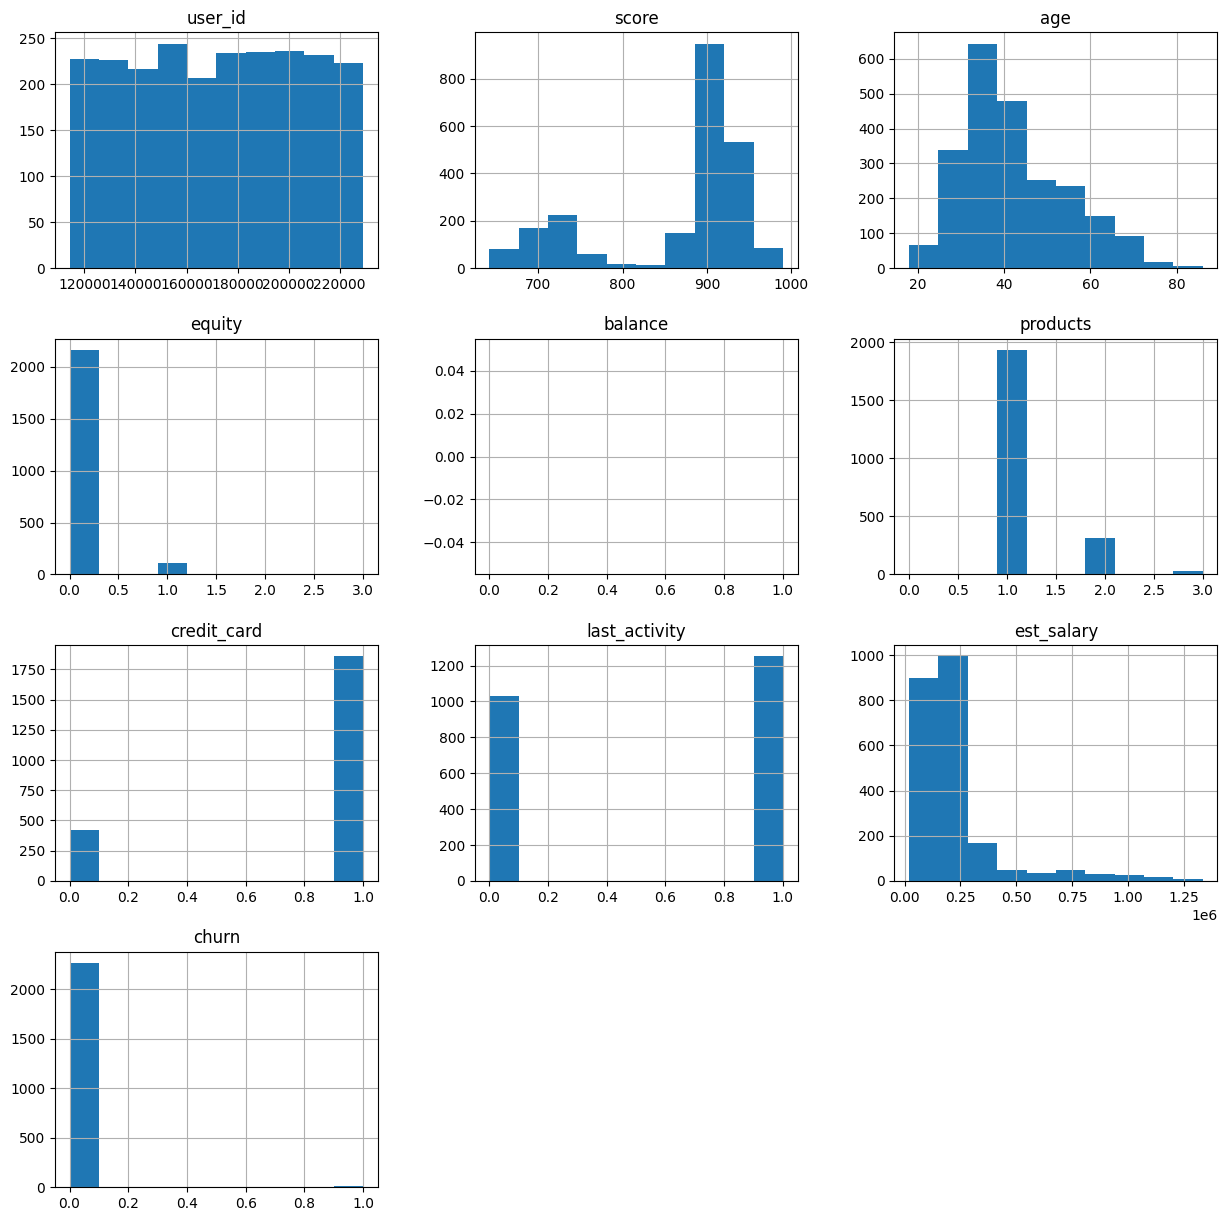

In [18]:
# Сделаем обзор данных для всех строк, где значения столбца balance пропущены 
data.query('balance.isna()').hist(figsize = (15, 15));

In [19]:
# Кол-во людей, которые не являются клиентами банка и у которых нет данных в столбце balance
data.query('churn == 1 and balance.isna()').shape[0]

13

**Пропуски в balance:**

Т.к. значения в этом столбце не зависят от значений в других столбцах, то данные пропуски являются случайными.

- Закономерности: 
    - у клиентов со score в диапазоне примерно [780; 850] пропусков в balance ощутимо меньше;
    - почти все клиенты с пропуском в balance - действующие.
- Возможные причины пропусков:

    - для надежных клиентов с высоким скорингом баланс не заполняется (например, чтобы снизить нагрузку на БД);
    - указан баланс кредитной карты, а пропуски - отрицательные балансы;
    - техническая: проблемы с обновлением данных, "подтягиванием" их из базы.
- Варианты устранения пропусков случайных переменных:
    - `для количественных переменных основным способом заполнения пропусков является заполнение их средними или медианными значениями` (если их относительно немного). Но т.к. доля таких пропусков большая, то заполнение средним или медианным может исказыть общее значение датасета. Особенно с учетом того, что само распределение значений balance не нормальное;
    - `заполнение пропусков нулями`: это нелогично, т.к. среди клиентов, у которых пропущено значение balance, явно есть те, у которых значение balance ненулевое. А мы, проставив нули, повлияем на дальнейший результат исследования (заполним пропуски логически неправильно + среднее значение balance сместится);
    - `удаление пропусков` также невозможно - мы потеряем огромный объем информации (порядка 23-24% всего датасета).   
- Решение:
    - пропуски не заполнять, однако их наличие будет учитываться в дальнейшей части исследования.

#### Преобразование столбца с данными и поле клиентов в булев тип

In [20]:
# Преобразуем данные о поле клиента с помощью функции get_dummies. Чтобы удалить ненужный первый столбец, передадим 
# параметру функции drop_first значение True
data['gender_orig'] = data['gender']
data = pd.get_dummies(data, columns=['gender'], drop_first = True)

# Сразу переименуем столбец, т.к. у нас в названии получится кириллическая M
data = data.rename(columns = {'gender_М': 'gender_m'})

#### Преобразование столбца с данными о городах в булев тип

In [21]:
# Преобразуем данные о поле города с помощью функции get_dummies. В данном случае нам нужны все столбцы, поэтому функции 
# не передаем параметр drop_first
data['city_orig'] = data['city']
data = pd.get_dummies(data, columns=['city'])

# Сразу переименуем столбцы
data = data.rename(columns = {
                                'city_Ростов': 'Ростов',
                                'city_Рыбинск': 'Рыбинск', 
                                'city_Ярославль': 'Ярославль'
})

**Выводы по предобработке данных:** данные обработаны, готовы к работе. После определения сегментов можно будет вернуться к вопросу о заполнении пропусков в столбце balance.

## Исследовательский анализ данных

#### Общее количество уникальных клиентов

In [22]:
# Посчитаем общее кол-во уникальных клиентов
num_unique_clients = data.user_id.nunique()
print(f'Кол-во уникальных клиентов составляет {num_unique_clients} человек.')

Кол-во уникальных клиентов составляет 9974 человек.


#### Распределение клиентов по городам

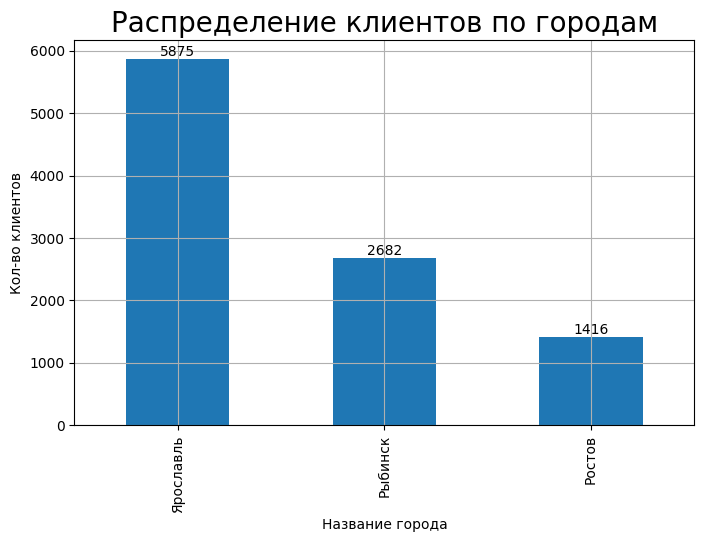

In [66]:
# Построим график распределение клиентов по городам
# Сгруппируем данные для графика
data_bar_city = data.city_orig.value_counts()

# Построим график
ax = data_bar_city.plot(kind = 'bar', figsize = (8, 5), grid = True)

# Добавим подписи осей и заголовок
ax.set_xlabel('Название города')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Распределение клиентов по городам', fontsize = 20)

# Добавим подписи значений над каждым столбцом 
ax.bar_label(container = ax.containers[0])

# Выведем столбчатую диаграмму на экран
plt.show()

#### Доли клиентов из каждого города в общем кол-ве клиентов

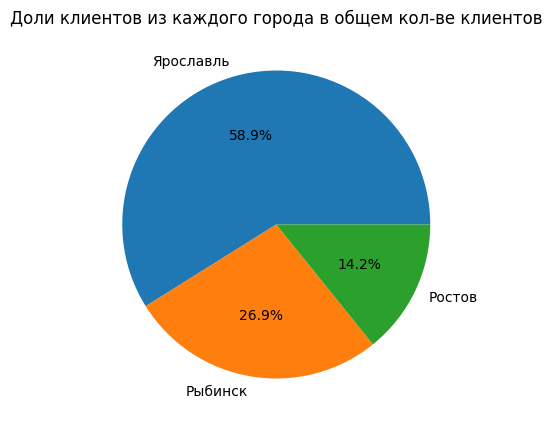

In [26]:
ax = data_bar_city.plot(kind = 'pie', figsize = (5, 5), autopct = '%1.1f%%')
ax.set_ylabel('')
plt.title('Доли клиентов из каждого города в общем кол-ве клиентов')
plt.show()

**Комментарий:** Большую часть клиентов составляют клиенты из Ярославля (59%).

#### Присвоение определенной категории в зависимости от кредитного рейтинга. Построение гистограммы и анализ получившегося результата

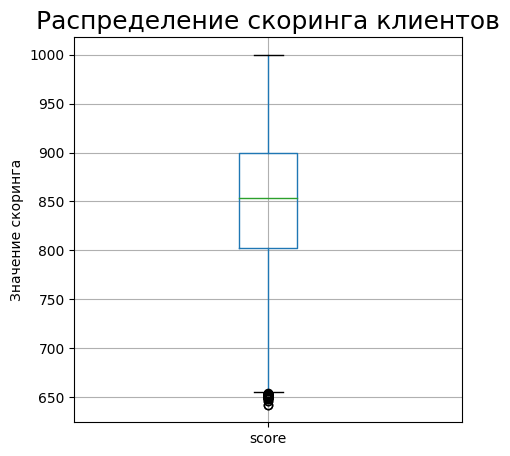

In [27]:
# Посмотрим на распределение скоринга, проверим переменную на выбросы, построив boxplot
ax = data.boxplot(column = 'score', figsize = (5, 5))
ax.set_title('Распределение скоринга клиентов', fontsize = 18)
ax.set_ylabel('Значение скоринга')
plt.show()

In [28]:
# Посмотрим на перцентили данной переменной
per_score_1, per_score_5, per_score_95, per_score_99 = np.percentile(data['score'], [1, 5, 95, 99]).astype('int')
print(f'Меньше 1% клиентов имеют скоринг ниже {per_score_1}.\nМеньше 5% клиентов имеют скоринг ниже {per_score_5}.\n\
Меньше 5% клиентов имеют скоринг выше {per_score_95}.\nМеньше 1% клиентов имеют скоринг выше {per_score_99}.')

Меньше 1% клиентов имеют скоринг ниже 687.
Меньше 5% клиентов имеют скоринг ниже 737.
Меньше 5% клиентов имеют скоринг выше 946.
Меньше 1% клиентов имеют скоринг выше 978.


In [29]:
# Проведем категоризацию данных по уровню скоринга
categories = ['очень плохой', 'плохой', 'средний', 'хороший', 'очень хороший']
categories_values = [0, 595, 765, 895, 950, 1000]
data['score_category'] = pd.cut(data['score'], bins = categories_values, labels = categories)

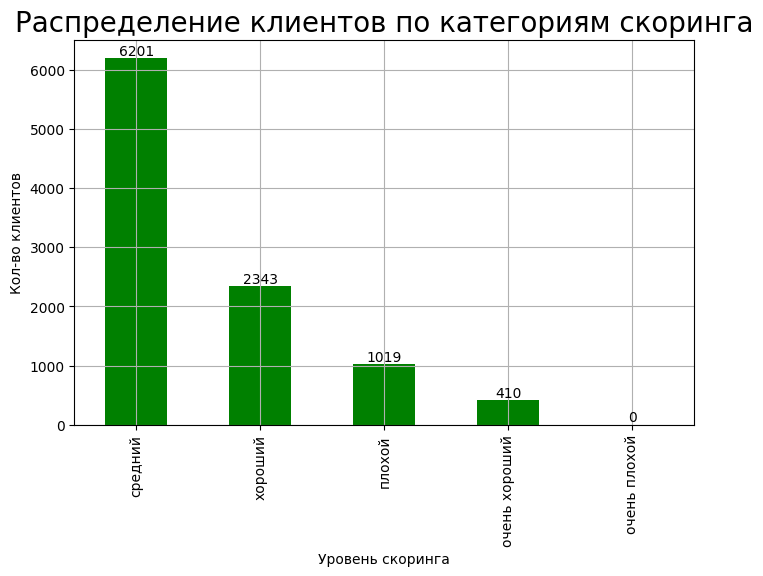

In [67]:
# Построим гистограмму распределения скоринга
data_bar_score = data.score_category.value_counts()

# Строим график
ax = data_bar_score.plot(kind = 'bar', figsize = (8, 5), grid = True, color = 'g')

# Добавим подписи осей и заголовок
ax.set_xlabel('Уровень скоринга')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Распределение клиентов по категориям скоринга', fontsize = 20)

# Добавим подписи значений над каждым столбцом 
ax.bar_label(ax.containers[0])

# Выведем столбчатую диаграмму на экран
plt.show()

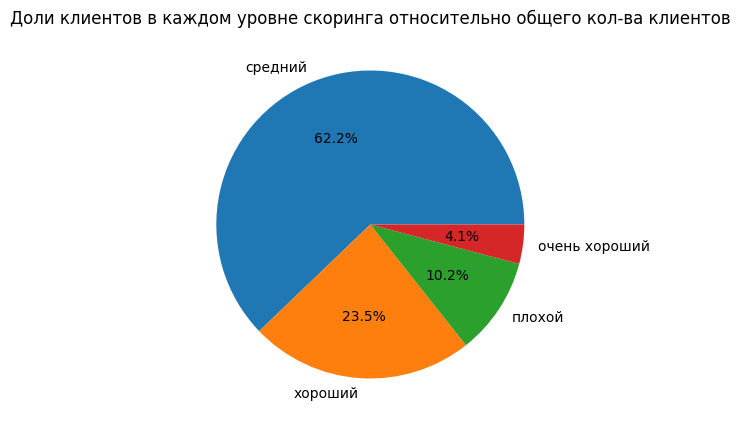

In [31]:
# Посмотрим на процентное соотношение категорий клиентов
ax = data_bar_score[0: 4].plot(kind = 'pie', figsize = (5, 5), autopct = '%1.1f%%')
ax.set_ylabel('')
plt.title('Доли клиентов в каждом уровне скоринга относительно общего кол-ва клиентов')
plt.show()

**Комментарии:** в нашем случае для категоризации данных переменной score были выбраны следующие критерии:
- 0-595 - очень плохой;
- 596 - 765 - плохой;
- 766 - 895 - средний;
- 896 - 950 - хороший;
- 951 - 1000 - очень хороший.

Категоризацию подтвердил расчет перцентилей: пороговый уровень, отличающий плохой рейтинг от среднего, составляет 737, а по критериям - 765. Общая доля клиентов со средним и хорошим скорингом составляет 85.7%, что является хорошим показателем качества клиентов. 
Выбросов (значений больше 1000 или меньше 0) в данной переменной не было. 

#### Средняя и медианная зарплата по городам. Анализ выбросов

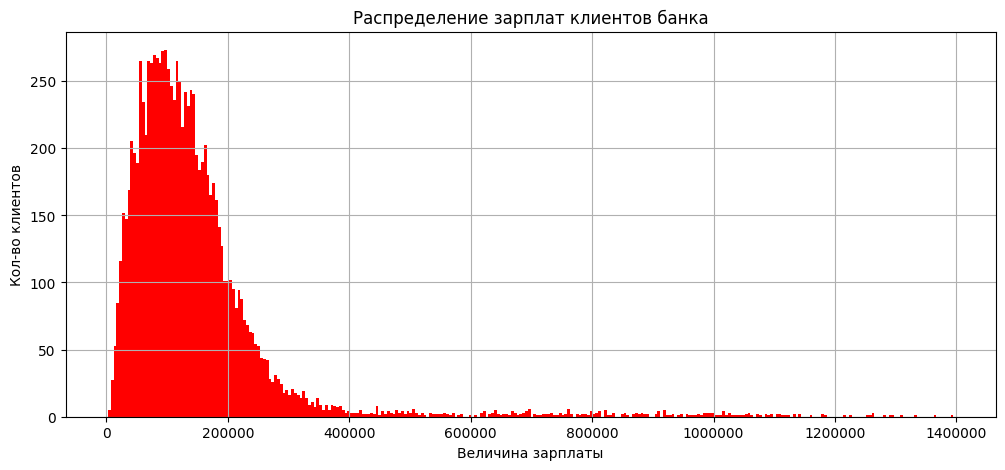

In [32]:
# Построим гистограмму зарплат
ax = data['est_salary'].hist(bins = 300, figsize = (12, 5), color = 'r')
ax.set_title('Распределение зарплат клиентов банка')
ax.set_xlabel('Величина зарплаты')
ax.set_ylabel('Кол-во клиентов')
ax.ticklabel_format(style='plain')
plt.show()

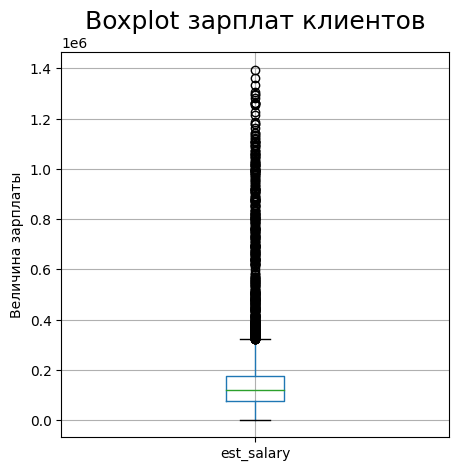

In [33]:
# Посмотрим на распределение зарплат, проверим переменную на выбросы, построив boxplot
ax = data.boxplot(column = 'est_salary', figsize = (5, 5))
ax.set_title('Boxplot зарплат клиентов', fontsize = 18)
ax.set_ylabel('Величина зарплаты')
plt.show()

In [34]:
# Посмотрим на перцентили данной переменной
per_salary_1, per_salary_5, per_salary_95, per_salary_99 = np.percentile(data['est_salary'], [1, 5, 95, 99]).astype('int')
print(f'Меньше 1% клиентов имеют зарплату ниже {per_salary_1}.\nМеньше 5% клиентов имеют зарплату ниже {per_salary_5}.\n\
Меньше 5% клиентов имеют зарплату выше {per_salary_95}.\nМеньше 1% клиентов имеют зарплату выше {per_salary_99}.')

Меньше 1% клиентов имеют зарплату ниже 17341.
Меньше 5% клиентов имеют зарплату ниже 32080.
Меньше 5% клиентов имеют зарплату выше 316360.
Меньше 1% клиентов имеют зарплату выше 886322.


In [35]:
# Посмотрим на среднюю и медианную зарплату по городам
salaries_in_the_cities = data.groupby('city_orig').agg(average_salary = ('est_salary','mean'),\
                                                       median_salary = ('est_salary','median')).round(2)
salaries_in_the_cities.columns = ['Средняя зарплата', 'Медианная зарплата']
salaries_in_the_cities

,Средняя зарплата,Медианная зарплата
city_orig,,
Ростов,111518.46,100059.38
Рыбинск,134775.31,113304.83
Ярославль,162470.36,127919.68


In [36]:
# Узнаем, клиенты из каких городов имеют самые большие зарплаты
data.query('est_salary > @per_salary_99').sort_values(by = 'est_salary').tail(20)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_orig,gender_m,city_orig,Ростов,Рыбинск,Ярославль,score_category
663,180853,949,45,0,NaN,1,1,0,1142166.48,0,М,1,Ярославль,0,0,1,хороший
6885,152005,927,34,5,3782453.73,3,0,1,1142435.95,1,Ж,0,Ярославль,0,0,1,хороший
8200,188837,750,53,0,NaN,1,1,0,1162181.88,0,М,1,Ярославль,0,0,1,плохой
6156,198495,794,41,0,NaN,1,1,0,1176946.66,0,Ж,0,Ярославль,0,0,1,средний
1813,205696,718,25,0,NaN,1,1,1,1180070.17,0,М,1,Ярославль,0,0,1,плохой
3279,155712,958,56,5,3797685.28,2,1,1,1185539.68,0,М,1,Ярославль,0,0,1,очень хороший
3366,140920,741,46,0,NaN,1,1,1,1214615.32,0,Ж,0,Ярославль,0,0,1,плохой
8007,126189,934,39,0,NaN,1,1,1,1226911.03,0,М,1,Ярославль,0,0,1,хороший
1027,119793,1000,50,5,12909691.02,1,1,0,1253653.40,0,М,1,Ярославль,0,0,1,очень хороший
302,164876,942,40,0,NaN,1,1,0,1256537.74,0,М,1,Ярославль,0,0,1,хороший


**Комментарии:** зарплата выше 886 322 рублей в математическом плане является выбросом, однако в логическом плане это богатые клиенты нашего банка, которых нельзя искючать из исследования. Также нельзя исключать из исследования клиентов с низкой зарплатой, т.к. у нас присутствуют продукты разной доступности, такие как push-уведомления и ежегодное обслуживание дебетовых карт. По сути в данной переменной нет выбросов, однако дальнейшее исследование следует проводить с учетом выявленных категорий. 

#### Изучение баланса денежных средств на счетах клиентов. Анализ выбросов

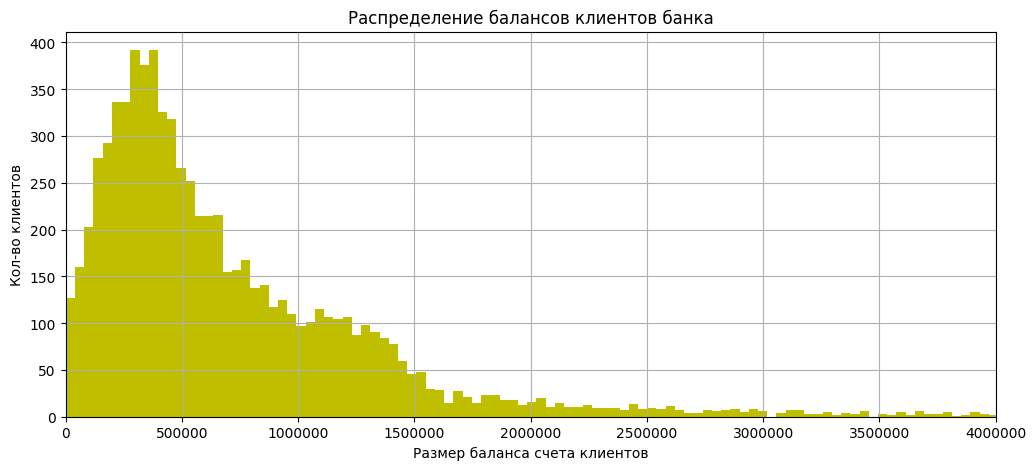

In [37]:
# Построим гистограмму балансов
ax = data['balance'].hist(bins = 3000, figsize = (12, 5), color = 'y')
ax.set_title('Распределение балансов клиентов банка')
ax.set_xlabel('Размер баланса счета клиентов')
ax.set_ylabel('Кол-во клиентов')
ax.ticklabel_format(style='plain')
plt.xlim(0, 4000000)
plt.show()

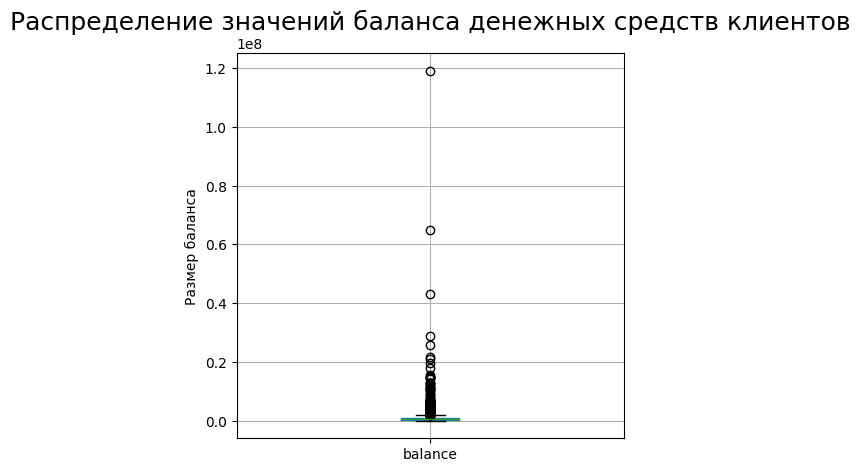

In [38]:
# Посмотрим на распределение баланса денежных средств, проверим переменную на выбросы, построив boxplot
ax = data.boxplot(column = 'balance', figsize = (5, 5))
ax.set_title('Распределение значений баланса денежных средств клиентов', fontsize = 18)
ax.set_ylabel('Размер баланса')
plt.show()

In [39]:
# Посмотрим на перцентили данной переменной
per_balance_1, per_balance_5, per_balance_95, per_balance_99 = np.percentile(data.query('balance.notnull()')['balance'],\
                                                                             [1, 5, 95, 99]).astype('int')
print(f'Меньше 1% клиентов имеют баланс счета ниже {per_balance_1}.\nМеньше 5% клиентов имеют баланс счета \
ниже {per_balance_5}.\nМеньше 5% клиентов имеют баланс счета выше {per_balance_95}.\nМеньше 1% клиентов имеют \
баланс счета выше {per_balance_99}.')

Меньше 1% клиентов имеют баланс счета ниже 23230.
Меньше 5% клиентов имеют баланс счета ниже 100057.
Меньше 5% клиентов имеют баланс счета выше 2114078.
Меньше 1% клиентов имеют баланс счета выше 4827211.


In [40]:
# Посмотрим на среднюю и медианную баланс счета по городам без учета выбросов
balance_in_the_cities = data.groupby('city_orig').agg(average_balance = ('balance','mean'),\
                                                       median_balance = ('balance','median')).round(2)
balance_in_the_cities.columns = ['Средний баланс счета', 'Медианный баланс счета']
balance_in_the_cities

,Средний баланс счета,Медианный баланс счета
city_orig,,
Ростов,661523.93,485619.82
Рыбинск,715884.61,503477.93
Ярославль,924424.95,544525.02


**Комментарии:** есть очень богатые клиенты (у которых баланс счета более 4 800 000 рублей - таких не более 1%), но тут ситуация такая же, как с зарплатами: математически такие значения являются выбросами, но логически такие клиенты - одни из самых ценных для нас.

#### Распределение клиентов по количеству продуктов. Анализ выбросов. Категоризация данных

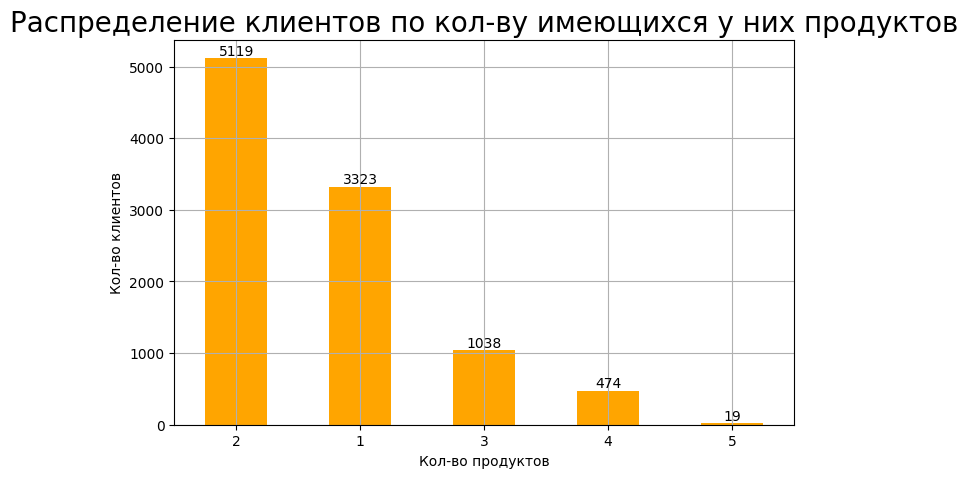

In [68]:
# Построим график распределения клиентов по кол-ву продуктов
data_bar_products = data.products.value_counts()
ax = data_bar_products.plot(kind = 'bar', figsize = (8, 5), grid = True, color = 'orange')
ax.set_xlabel('Кол-во продуктов')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Распределение клиентов по кол-ву имеющихся у них продуктов', fontsize = 20)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 0)
plt.show()

In [42]:
# Удалим тех людей, кто не имеет ни одного продукта и не является клиентом банка
data = data.drop(data[(data['churn'] == 1) & (data['products'] == 0)].index)

In [43]:
# Проведем категоризацию данных по кол-ву клиентов банка
categories = ['одни продукт', 'два продукта', 'три и более продуктов']
categories_values = [0, 1, 2, 100]
data['products_category'] = pd.cut(data['products'], bins = categories_values, labels = categories)

**Комментарии:** анализа на выбросы не было т.к. на столбчатой диаграмме было видно сразу все значения. Данная переменная была категоризована, т.к. она является одной из целевых в исследовании. Критерии категоризации:
- для клиентов с кол-вом продуктов 1 и 2 пока что нет второго признака, по которым их можно разделить. Укрупнять эти группы не стоит - они итак достаточно большие. Поэтому клиенты с 1 и 2 продуктами были выделены в самостоятельные категории;
- клиенты с 3 и более продуктами были объединены в одну группу для укрупнения.

#### Изучение возрастного диапазона клиентов банка. Разбитие клиентов по возрастным категориям. Анализ выбросов

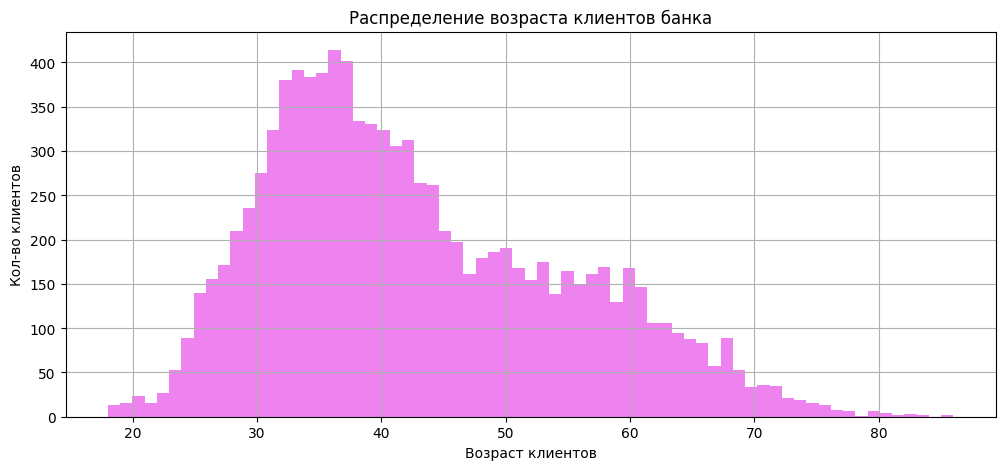

In [44]:
# Построим гистограмму возраста клиентов
ax = data['age'].hist(bins = 69, figsize = (12, 5), color = 'violet')
ax.set_title('Распределение возраста клиентов банка')
ax.set_xlabel('Возраст клиентов')
ax.set_ylabel('Кол-во клиентов')
ax.ticklabel_format(style='plain')
plt.show()

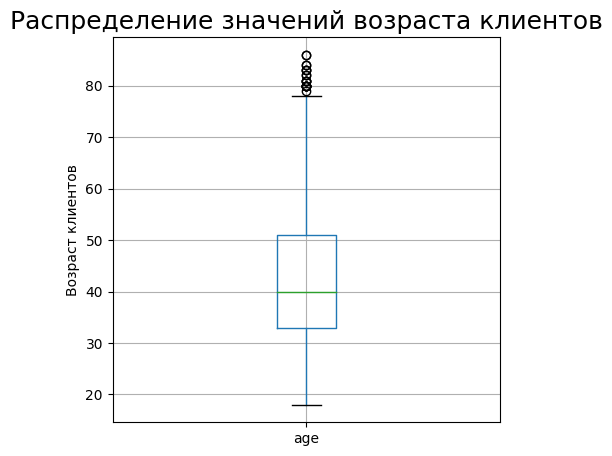

In [45]:
# Посмотрим на распределение возраста клиентов банка, проверим переменную на выбросы, построив boxplot
ax = data.boxplot(column = 'age', figsize = (5, 5))
ax.set_title('Распределение значений возраста клиентов', fontsize = 18)
ax.set_ylabel('Возраст клиентов')
plt.show()

In [46]:
# Проведем категоризацию возраста клиентов - поделим клиентов на равные по кол-ву группы с помощью qcut
data['age_category'] = pd.qcut(data['age'], [0, .25, .5, .75, 1.])

In [47]:
# Узнаем средний возраст клиентов в разбивке по городам и полу
age_in_the_cities = data.pivot_table(index = ['city_orig', 'gender_orig'], values = 'age').round()
age_in_the_cities.columns = ['Средний возраст клиента']
age_in_the_cities

Средний возраст клиента
city_orig gender_orig                         
Ростов    Ж                               47.0
          М                               41.0
Рыбинск   Ж                               46.0
          М                               41.0
Ярославль Ж                               45.0
          М                               40.0

**Комментарии:** средний возраст клиентов не опускается ниже 40 лет независимо от пола и города проживания.

#### Сводная таблица: возраст/пол - кредитный рейтинг

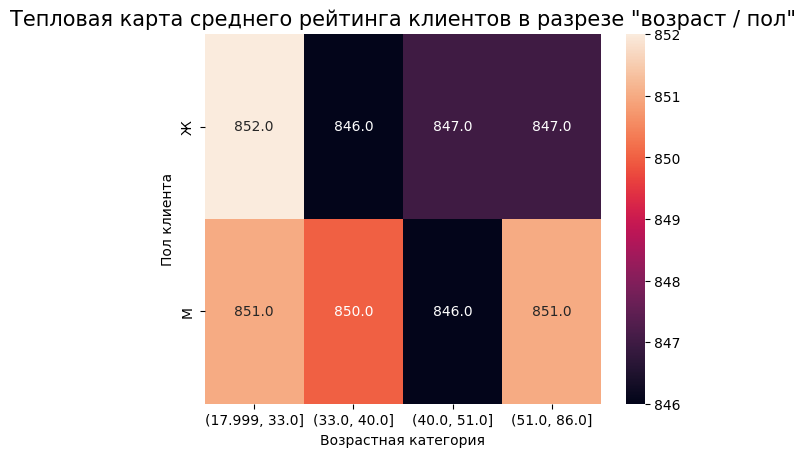

In [48]:
middle_score = data.pivot_table(index = 'gender_orig', columns = 'age_category', values = 'score').round()
ax = sns.heatmap(middle_score, annot = True, fmt = '.1f')
ax.set_title('Тепловая карта среднего рейтинга клиентов в разрезе "возраст / пол"', fontsize = 15)
ax.set_xlabel('Возрастная категория')
ax.set_ylabel('Пол клиента')
plt.rcParams["figure.figsize"] = (8, 4)
plt.show()

**Комментарий:** средние скоринги находятся в среднем диапазоне, что подтверждает ранее выдвинутое предположение о высоком качестве клиентской базы. 

#### Матрица корреляций

In [49]:
# Построим матрицу корреляций
matrix_correlation = data.corr().round(2)
display(matrix_correlation)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_m,Ростов,Рыбинск,Ярославль
user_id,1.00,0.01,0.02,0.01,0.01,-0.00,0.00,-0.03,-0.00,-0.01,0.03,-0.03,0.01,0.01
score,0.01,1.00,-0.01,0.06,0.24,-0.00,-0.10,-0.03,0.16,0.11,0.01,-0.04,-0.00,0.03
age,0.02,-0.01,1.00,0.02,0.07,0.02,-0.12,-0.01,-0.04,-0.05,-0.21,0.05,0.03,-0.06
equity,0.01,0.06,0.02,1.00,0.16,0.43,-0.17,-0.00,-0.17,0.27,-0.02,0.04,-0.01,-0.02
balance,0.01,0.24,0.07,0.16,1.00,0.08,-0.06,0.02,0.34,0.09,0.05,-0.04,-0.03,0.06
products,-0.00,-0.00,0.02,0.43,0.08,1.00,-0.25,0.04,-0.12,0.30,-0.02,-0.01,-0.04,0.04
credit_card,0.00,-0.10,-0.12,-0.17,-0.06,-0.25,1.00,-0.03,0.04,-0.13,0.13,-0.10,-0.05,0.11
last_activity,-0.03,-0.03,-0.01,-0.00,0.02,0.04,-0.03,1.00,0.00,0.17,-0.01,0.01,0.05,-0.05
est_salary,-0.00,0.16,-0.04,-0.17,0.34,-0.12,0.04,0.00,1.00,0.00,0.08,-0.11,-0.06,0.13
churn,-0.01,0.11,-0.05,0.27,0.09,0.30,-0.13,0.17,0.00,1.00,0.14,0.01,-0.03,0.02


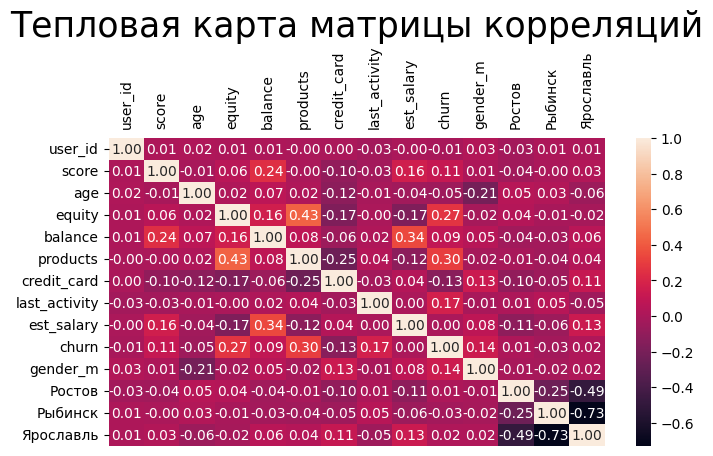

In [50]:
# Построим heatmap для датасета для большей наглядности связей с аналогичным расположением подписей осей
ax = sns.heatmap(matrix_correlation, annot = True, fmt = '.2f')
ax.set_title('Тепловая карта матрицы корреляций', fontsize = 25)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10, labelbottom = False, bottom = False,\
                top = False, labeltop = True)
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20, 15)
plt.show()

**Выводы:** тут можно выдвинуть несколько предположений:
- чем больше у клиента собственности (equity), тем больше у него кредитных продуктов. Рассчет корреляции показывает связь умеренной силы, но сильнее, чем у остальных параметров. Поэтому для подтверждения связи и сегментации возьмем этот критерий, как второй, по которому будем делить наших клиентов;
- чем больше продуктов у клиента, тем больше отточных клиентов из этого сегмента - связь есть и надо думать над структурой продуктов. Возможно клиент пользуется продуктами и не получает удовлетворение или даже расстраивается из-за каких-то моментов и уходит;
- чем больше у клиента продуктов, доля кредитных карт у таких клиентов идет на убыль;
- связь между кол-вом продуктов и заработной платой клиента очень слабая;
- связи между кол-вом продуктов, возрастом и полом нет; 
- высокие значения корреляции в городах обусловлены самим типом переменных: если город Ростов, то он естественно не может быть одновременно Ярославлем, т.е. чем больше кол-во клиентов из Ростова, тем меньше из Ярославля при неизменном размере датасета. Эту связь и показывают наши расчеты. 

#### Определение, из каких категорий клиентов происходит самый большой отток: зависимость оттока от кредитного рейтинга, заработной платы, возраста, пола, города

Для ответа на указанные в подзаголовке вопросы воспользуемся построенной ранее тепловой картой матрицы корреляций. Для определения степени связи используем шкалу Чеддока. Также будем учитывать выбросы (с математической точки зрения), т.к. они влияют на коэффициент корреляции. 
Зависимость оттока от:
- кредитного рейтинга - коэффициент 0.11: слабая положительная связь. Однако в столбце score отсутствуют выбросы;
- **оценочная стоимость активов клиента (equity) - коэффициент 0.27**: слабая положительная связь;
- **кол-во продуктов - коэффициент 0.3**: слабая положительная связь. Выбросы отсутствуют;
- наличие кредитной карты - коэффициент -0.13: слабая отрицательная связь. Булева переменная, поэтому выбросы отсутствуют;
- последняя активность - коэффициент 0.17: слабая положительная связь. Булева переменная, поэтому выбросы отсутствуют;
- пол - коэффициент 0.14: слабая положительная связь. Булева переменная, поэтому выбросы отсутствуют.

С остальными переменными связь отсутствует.

#### Продукты, используемые клиентами из "зоны риска" (с низким скорингом)

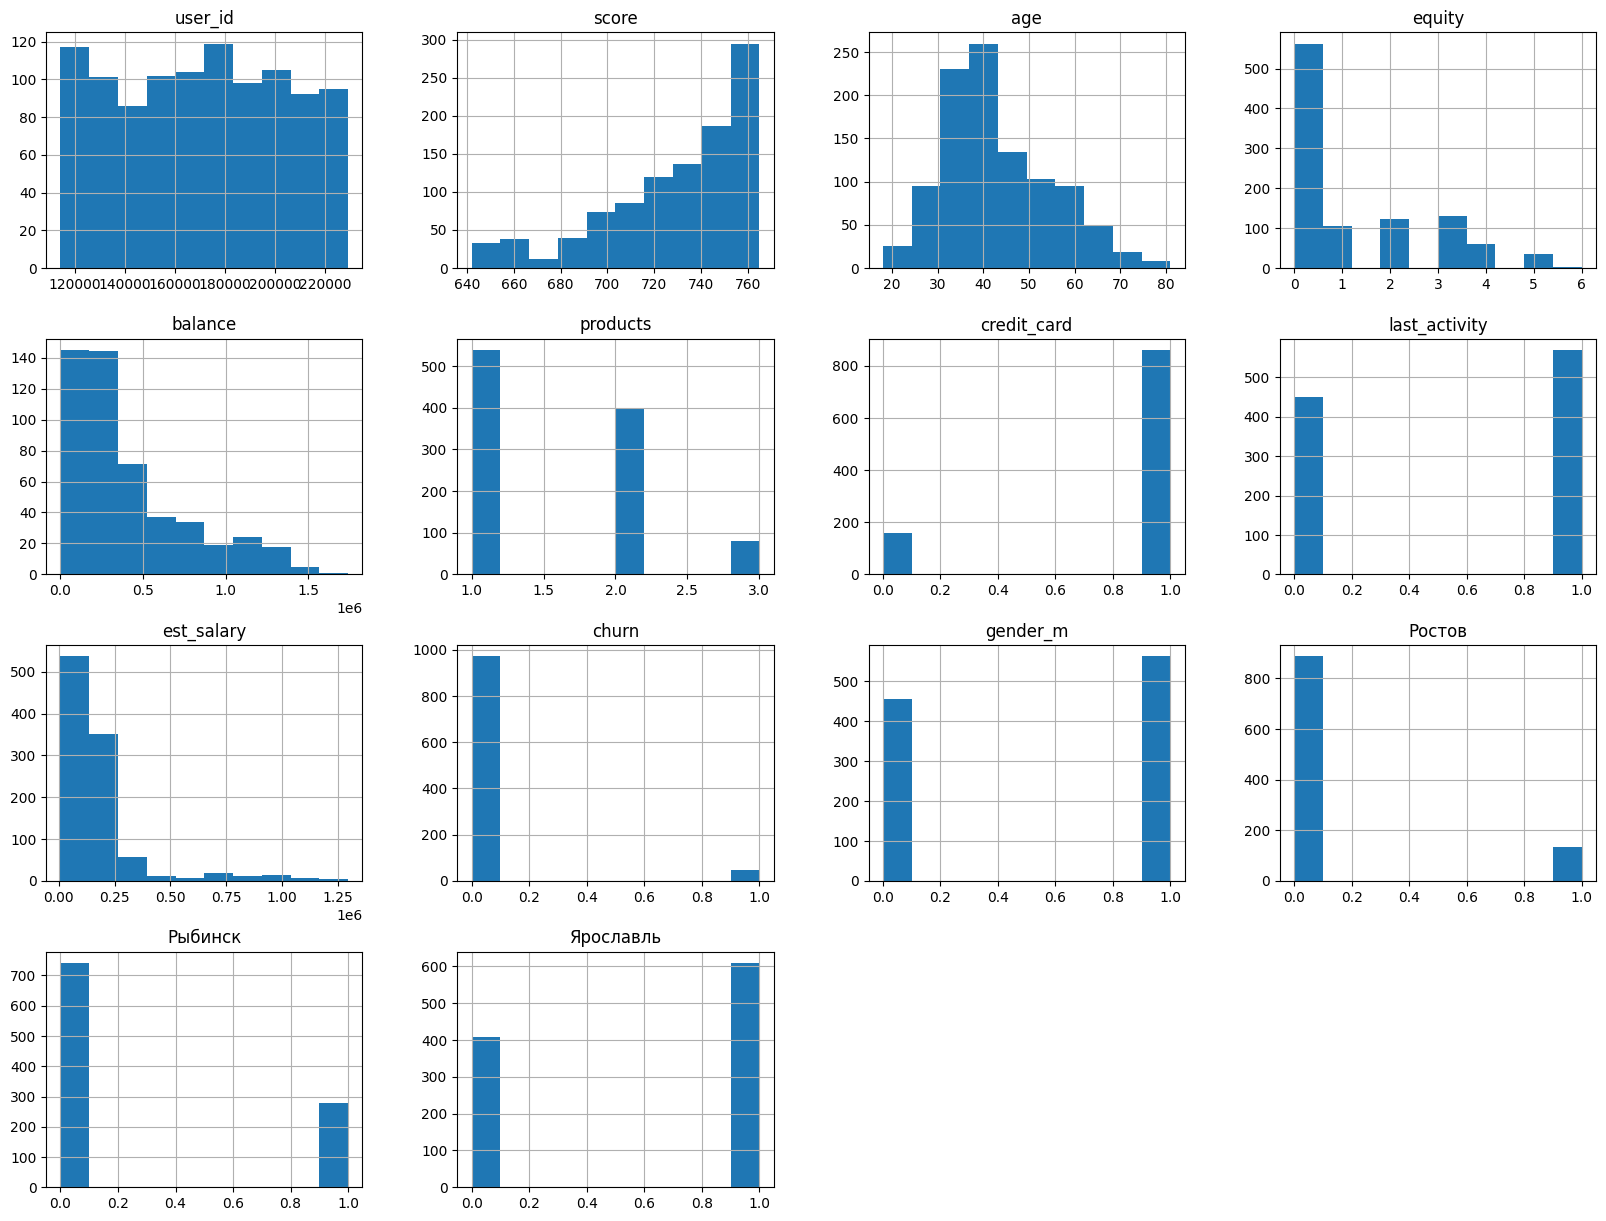

In [51]:
# Посмотрим на общую информацию по клиентам из "зоны риска"
data.query('score_category == "плохой" or score_category == "очень плохой"').hist();

**Комментарии:** портрет ненадежного клиента выглядит следующим образом:
- возраст: 35-40 лет;
- оценка собственного капитала близка к нулю;
- баланс денежных средств также близок к нулю;
- имеет два или чаще один продукт банка;
- 80% клиентов из категории риска имеют кредитную карту;
- больше 50% таких клиентов совершали какие-либо действия более месяца назад, но большинство из таких клиентов остаются активными;
- чаще всего такие клиенты встречаются в Ростове, затем в Рыбинске. В Ярославле кол-во таких клиентов меньше всего.

Попробуем сделать предположение, какими дополнительными продуктами могут пользоваться клиенты, у которых два продукта (помимо кредитной карты).

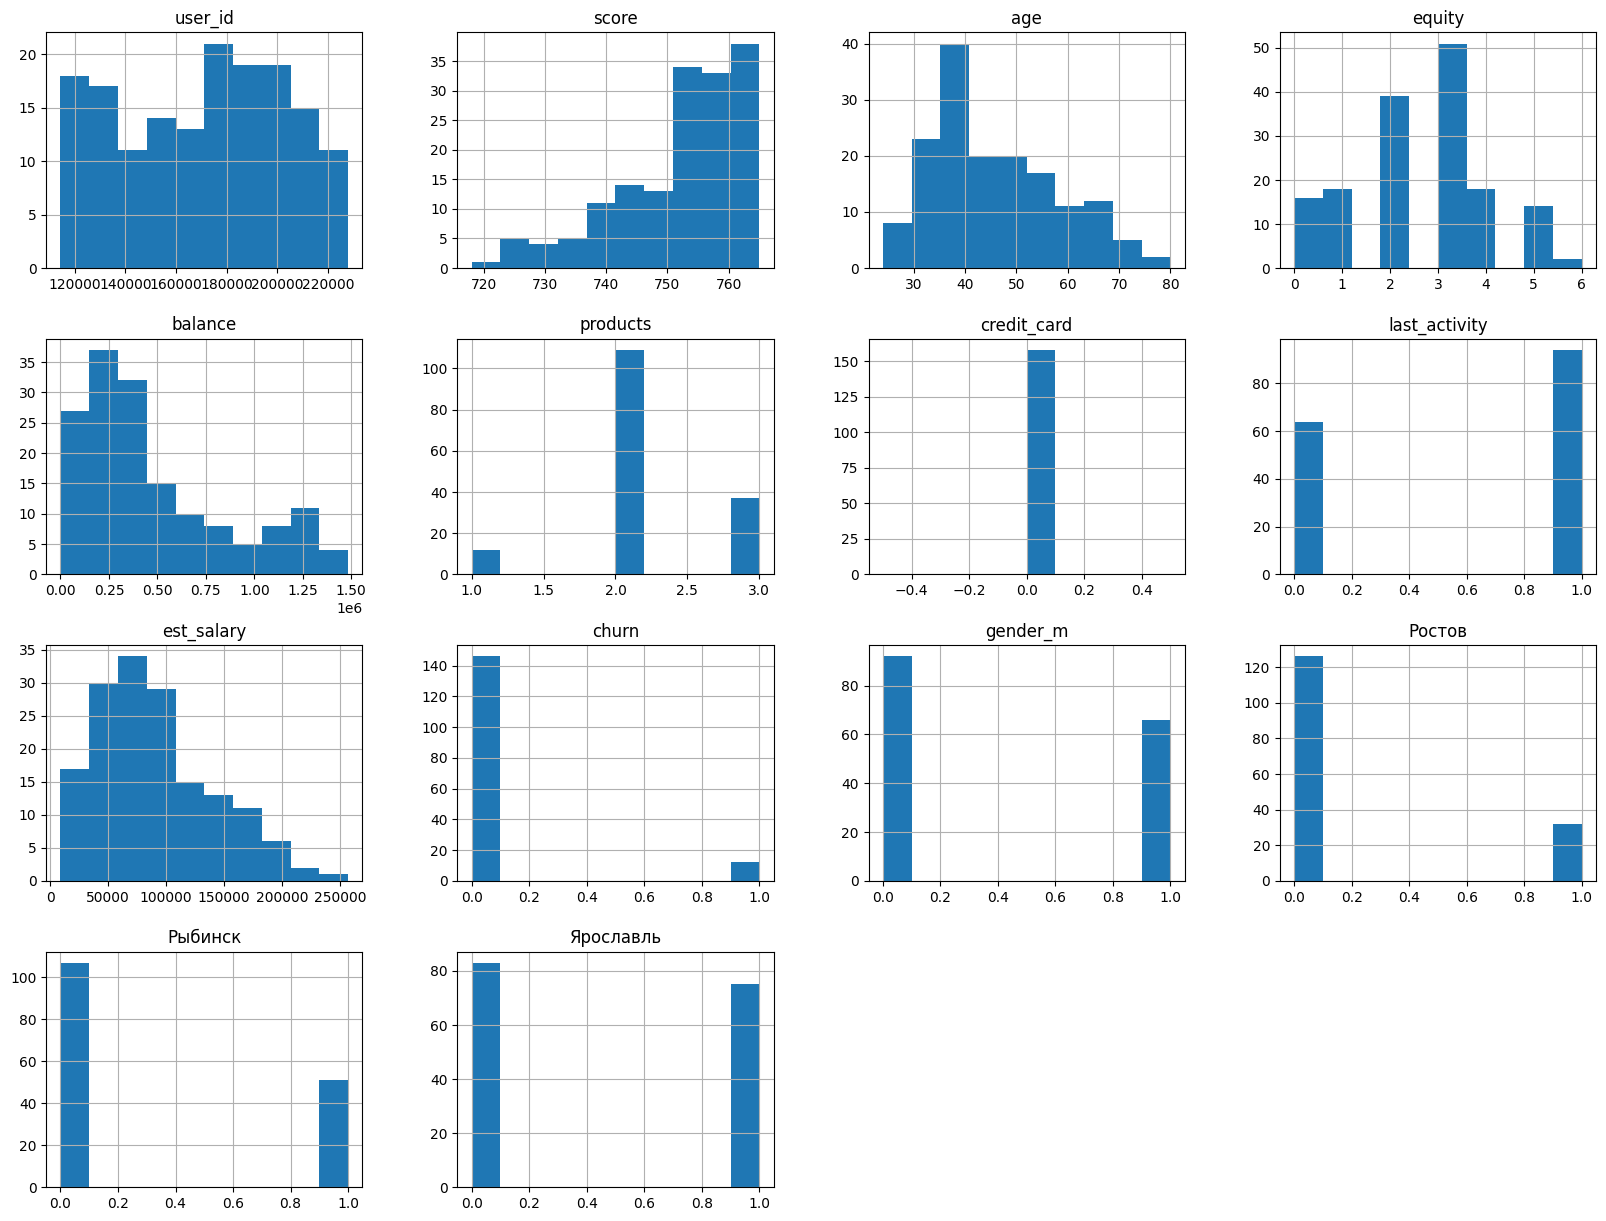

In [52]:
# Посмотрим, какие из клиетнов являются ненадежными и пользуются продуктами помимо кредитки
data.query('(score_category == "плохой" or score_category == "очень плохой") and credit_card != 1').hist();

**Комментарии:** таких клиентов (ненадежных и использующих продукты банка, за исключением кредитки) совсем немного - порядка 170 человек. Однако у них далеко ненулевые значения параметра equity - соответственно одним из продуктов у таких клиентов может быть кредит, который выдается только под залог имущества. Дополнить эту ситуацию может страховка по кредиту.

Другой вариант: смс-информирование или наличие дебетовой карты, по которой списывается плата за ежегодное обслуживание.

#### Расчет среднего % оттока клиентов из банка

In [53]:
# Посчитаем средний % оттока клиентов
avg_percentage_churn = data[data['churn'] == 1].shape[0] / data.shape[0]
print(f'Средний процент оттока клиентов из банка составляет {avg_percentage_churn:.1%}')

Средний процент оттока клиентов из банка составляет 18.2%


## Разделение пользователей на основе данных о количестве потребляемых продуктов на категории

Т.к. у нас отток клиентов на высоком уровне, то мы должны сегментировать наших клиентов по тем признакам, которые влияют именно на него. Если мы посмотрим на матрицу корреляций, то такими признаками, которые сильнее всего влияют на отток, являются products (кол-во банковских продуктов у клиента - изначальное требование заказчика исследования сегментировать пользователей по этому признаку) и equity (оценка стоимости активов клиента).  

Чтобы определить границы сегментов, построим диаграмму рассеяния, по оси Х у которой будет значение оценки стоимости активов, а по оси Y - кол-во продуктов, а на пересечении - клиенты.

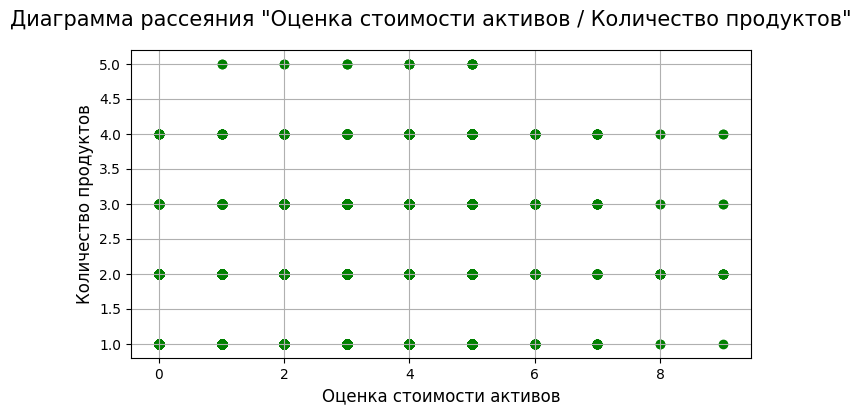

In [54]:
# Построим диаграмму разброса
plt.figure(figsize=(8, 4))
plt.scatter(data['equity'], data['products'], c='green')
plt.suptitle('Диаграмма рассеяния "Оценка стоимости активов / Количество продуктов"', fontsize = 15)
plt.xlabel('Оценка стоимости активов', fontsize = 12)
plt.ylabel('Количество продуктов', fontsize = 12)
plt.grid(True)
plt.show()

Диаграмма рассеяния нам не помогла, т.к. обе переменные являются количественными дискретными и наши клиетны "сливаются" на пересечении значений этих переменных. Поэтому дальше построим тепловую карту распределения клиентов в зависимости от параметров.

Проведем исследовательский анализ переменной 'equity' чтобы определить, по какому признаку провести категоризацию этого параметра. 

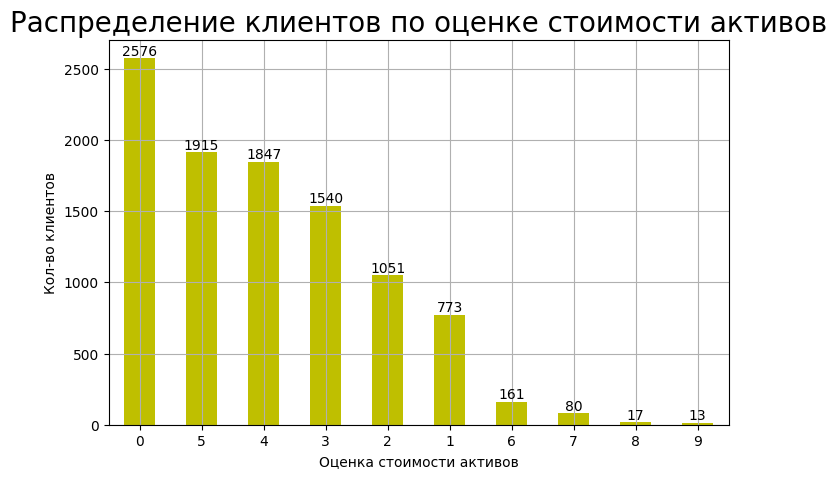

In [69]:
# Построим график распределения клиентов по величине оценки активов
data_bar_equity = data.equity.value_counts()
ax = data_bar_equity.plot(kind = 'bar', figsize = (8, 5), grid = True, color = 'y')
ax.set_xlabel('Оценка стоимости активов')
ax.set_ylabel('Кол-во клиентов')
ax.set_title('Распределение клиентов по оценке стоимости активов', fontsize = 20)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 0)
plt.show()

Чтобы сегменты были примерно одинаковые по размеру, выберем такие интервалы:
- [0; 1] - низкий уровень стоимости активов (3349 человек);
- [2; 3] - средний уровень стоимости активов (2592 человека);
- [4, 5] - высокий уровень стоимости активов (3762 человека);
- [6; 9] - VIP-клиенты (271 человек) - выделен, как самый немногочисленный. Объединять его с другими - логически неправильно.

Слово "высокий" используется в отношении тех параметров, которые стоят за числовой оценкой стоимости активов клиентов.

In [56]:
# Проведем категоризацию переменной 'equity'
categories_equity = ['низкий уровень стоимости активов', 'средний уровень стоимости активов',\
                     'высокий уровень стоимости активов', 'VIP-клиенты']
categories_equity_values = [-0.1, 1, 3, 5, 100]
data['equity_category'] = pd.cut(data['equity'], bins = categories_equity_values, labels = categories_equity)

In [57]:
# Посмотрим на размеры получившихся сегментов - сколько клиентов входят в каждый сегмент
data.pivot_table(index = 'products_category', columns = 'equity_category', values = 'user_id', aggfunc = 'count')

equity_category,низкий уровень стоимости активов,средний уровень стоимости активов,высокий уровень стоимости активов,VIP-клиенты
products_category,,,,
одни продукт,2214,479,584,46
два продукта,979,1689,2314,137
три и более продуктов,156,423,864,88


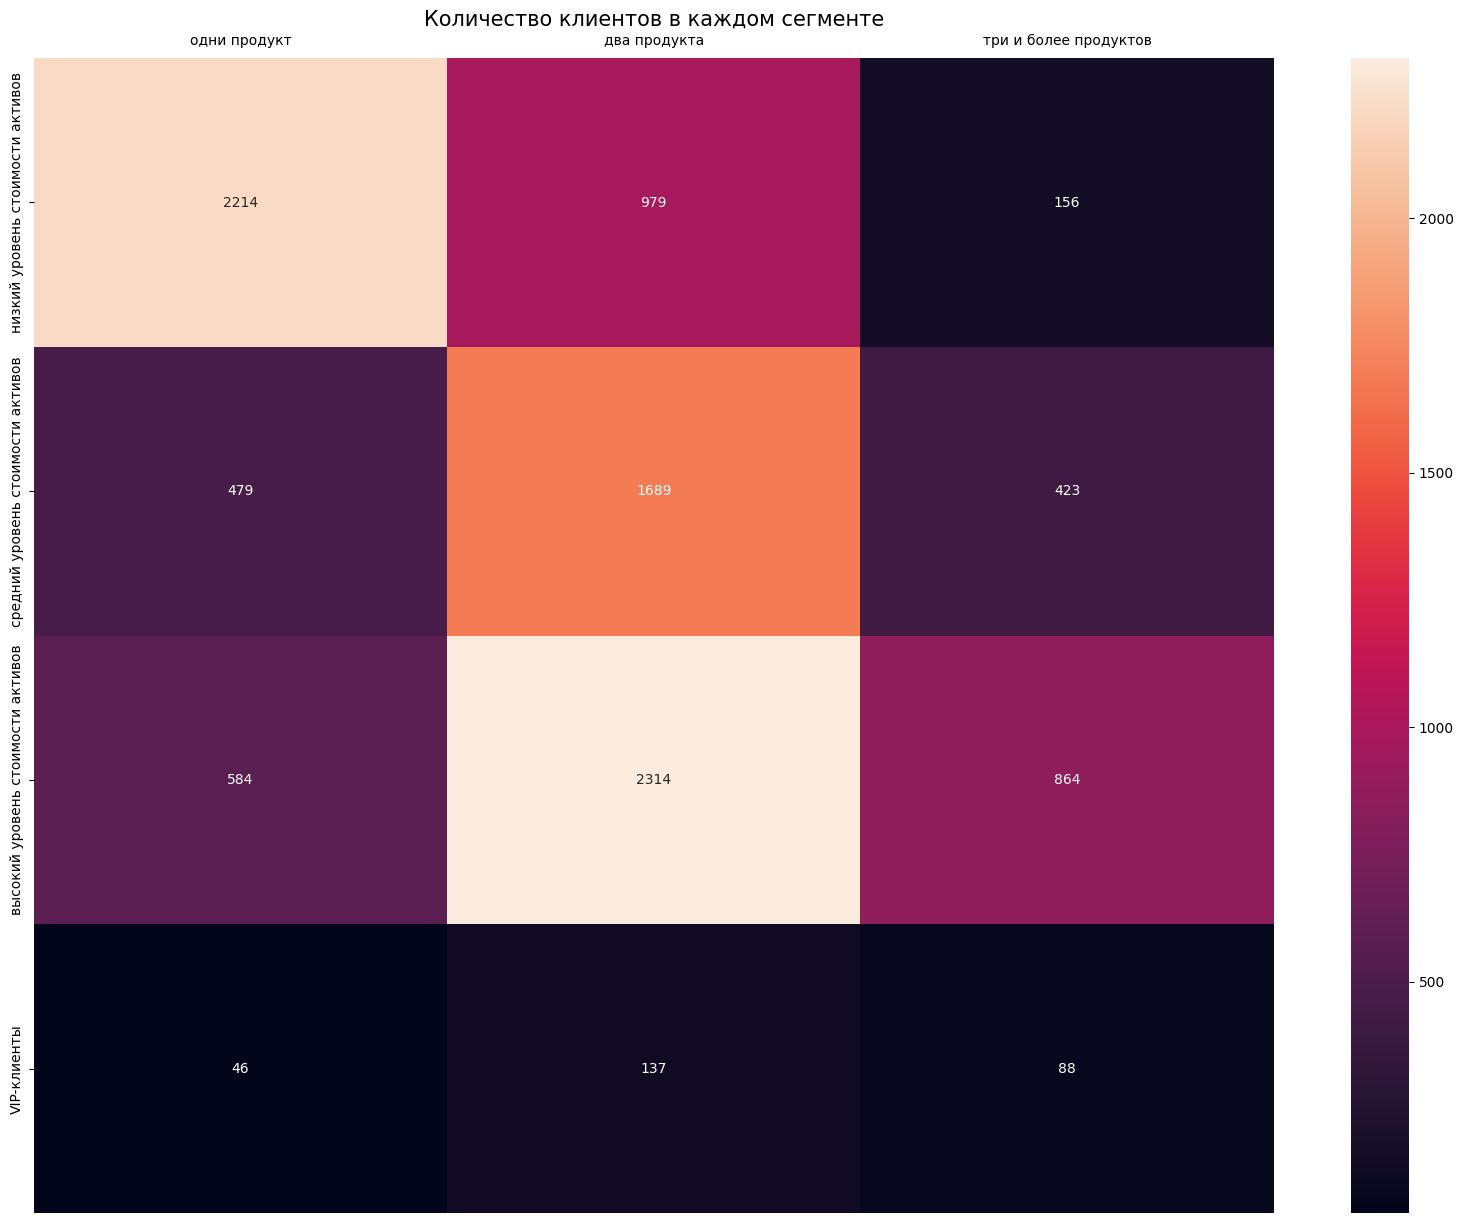

In [58]:
# Построим тепловую карту по кол-ву клиентов в наших сегментах
segments = data.pivot_table(index = 'equity_category', columns = 'products_category', values = 'user_id', aggfunc = 'count').round()
ax = sns.heatmap(segments, annot = True, fmt = '.0f')
plt.tick_params(axis = 'both', which = 'major', labelsize = 10, labelbottom = False, bottom = False,\
                top = False, labeltop = True)
ax.set_title('Количество клиентов в каждом сегменте', fontsize = 15)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

## Исследование отличительных черт получившихся групп 

In [59]:
# Опишем сегментированные данные итогового датасета
data.describe(include = 'all').round()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_orig,gender_m,city_orig,Ростов,Рыбинск,Ярославль,score_category,products_category,age_category,equity_category
count,9973.0,9973.0,9973.0,9973.0,7695.0,9973.0,9973.0,9973.0,9973.0,9973.0,9973,9973.0,9973,9973.0,9973.0,9973.0,9973,9973,9973,9973
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,4,3,4,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,М,NaN,Ярославль,NaN,NaN,NaN,средний,два продукта,"(33.0, 40.0]",высокий уровень стоимости активов
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4991,NaN,5875,NaN,NaN,NaN,6201,5119,2577,3762
mean,171758.0,849.0,43.0,3.0,827246.0,2.0,1.0,1.0,147799.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN
std,33696.0,65.0,12.0,2.0,1980327.0,1.0,0.0,0.0,139287.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
min,94561.0,642.0,18.0,0.0,0.0,1.0,0.0,0.0,2546.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
25%,142757.0,802.0,33.0,0.0,295699.0,1.0,0.0,0.0,75252.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
50%,172651.0,853.0,40.0,3.0,524295.0,2.0,1.0,1.0,119643.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN
75%,201164.0,900.0,51.0,4.0,980051.0,2.0,1.0,1.0,174500.0,0.0,NaN,1.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN


Для каждого сегмента построим портреты ушедших и активных клиентов.

In [60]:
# Составим портреты действующих и ушедших клиентов по сегментам

# Создадим списки с параметрами сегментов
product_category_list = list(data['products_category'].unique()) 
equity_category_list = list(data['equity_category'].unique())

# Cоставим вложенный цикл, чтобы пройти по всем сегментам
for i in product_category_list:
    for j in equity_category_list:
        print(f'Портрет клиентов из сегмента, которые имеют {i} и {j}.')
        
        # Агрегируем данные по ключевым характеристикам
        portrait = data.query('products_category == @i and equity_category == @j')\
                  .groupby('churn', as_index = False)\
                  .agg({'user_id': 'count',\
                        'score_category': pd.Series.mode,\
                        'score': np.mean,\
                        'age': np.mean,\
                        'balance': 'median',\
                        'credit_card': pd.Series.mode,\
                        'est_salary': 'median',\
                        'gender_orig': pd.Series.mode,\
                        
                        # При комбинации условий products_category == "три и более продуктов" and
                        # equity_category == "VIP-клиенты"' у нас появляется ValueError: Must produce aggregated value
                        # Это связано с багом. Чтобы этого не происходило, для поиска моды по 'last_activity' 
                        # используем lambda-функцию
                        'last_activity': lambda x: x.mode().iloc[0],\
                        'city_orig': pd.Series.mode }).round()
        
        # Рассчитаем процент оттока клиентов из сегмента
        avg_percentage_segment = portrait.loc[1, 'user_id'] / (portrait.loc[0, 'user_id'] + portrait.loc[1, 'user_id'])
        
        # Уберем лишний получившийся столбец churn
        portrait = portrait.loc[:,'user_id': 'city_orig']

        # Изменим типы данных для лучшего восприятия информации
        convert_dict = {'score': int,
                        'age': int,
                        'balance': int,
                        'est_salary': int}
        portrait = portrait.astype(convert_dict)

        # Заменим значения 0 на "Нет", а 1 - на "Да"
        portrait = portrait.replace(0, "Нет")
        portrait = portrait.replace(1, "Да")

        # Изменим название столбцов
        portrait.columns = ['Количество пользователей в сегменте',\
                            'Категория скоринга',\
                            'Среднее значение скоринга',\
                            'Средний возраст',\
                            'Баланс на счете',\
                            'Есть ли кредитная карта?',\
                            'Средняя зарплата клиента',\
                            'Пол',\
                            'Был ли клиент активен в последний месяц?',
                            'В каком городе чаще всего встречается такой клиент']

        # Транспонируем таблицу
        portrait = portrait.T

        # Укажем, какие клиенты действующие, а какие - ушедшие
        portrait.columns = ['Действующий клиент', 'Ушедший клиент']
        display(portrait)
        
        # Проверим, % оттока текущего сегмента выше, чем в среднем по банку или нет
        print(f'Процент оттока клиентов из данного сегмента составляет {avg_percentage_segment:.1%}')
        if avg_percentage_segment >= avg_percentage_churn:
            print('Отток клиентов из этого сегмента выше, чем в среднем по банку.')
        print()

Портрет клиентов из сегмента, которые имеют два продукта и низкий уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,888,91
Категория скоринга,средний,средний
Среднее значение скоринга,833,826
Средний возраст,43,42
Баланс на счете,187276,171329
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,120192,105665
Пол,Ж,М
Был ли клиент активен в последний месяц?,Да,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 9.3%

Портрет клиентов из сегмента, которые имеют два продукта и высокий уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,1749,565
Категория скоринга,средний,средний
Среднее значение скоринга,852,877
Средний возраст,43,40
Баланс на счете,688630,923205
Есть ли кредитная карта?,Да,Нет
Средняя зарплата клиента,104014,134000
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 24.4%
Отток клиентов из этого сегмента выше, чем в среднем по банку.

Портрет клиентов из сегмента, которые имеют два продукта и VIP-клиенты.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,91,46
Категория скоринга,средний,средний
Среднее значение скоринга,855,883
Средний возраст,44,41
Баланс на счете,549637,777093
Есть ли кредитная карта?,Да,Нет
Средняя зарплата клиента,97050,110184
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 33.6%
Отток клиентов из этого сегмента выше, чем в среднем по банку.

Портрет клиентов из сегмента, которые имеют два продукта и средний уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,1413,276
Категория скоринга,средний,средний
Среднее значение скоринга,828,847
Средний возраст,44,42
Баланс на счете,373634,576769
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,98988,114962
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 16.3%

Портрет клиентов из сегмента, которые имеют одни продукт и низкий уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,2160,54
Категория скоринга,хороший,средний
Среднее значение скоринга,861,827
Средний возраст,42,47
Баланс на счете,166133,143546
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,165020,100455
Пол,М,М
Был ли клиент активен в последний месяц?,Да,Нет
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 2.4%

Портрет клиентов из сегмента, которые имеют одни продукт и высокий уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,487,97
Категория скоринга,средний,средний
Среднее значение скоринга,850,867
Средний возраст,43,40
Баланс на счете,641170,622979
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,111599,110761
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 16.6%

Портрет клиентов из сегмента, которые имеют одни продукт и VIP-клиенты.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,32,14
Категория скоринга,средний,средний
Среднее значение скоринга,857,892
Средний возраст,42,37
Баланс на счете,518398,522149
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,102356,103638
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 30.4%
Отток клиентов из этого сегмента выше, чем в среднем по банку.

Портрет клиентов из сегмента, которые имеют одни продукт и средний уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,409,70
Категория скоринга,средний,средний
Среднее значение скоринга,828,836
Средний возраст,42,41
Баланс на счете,336738,357196
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,103821,101915
Пол,М,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 14.6%

Портрет клиентов из сегмента, которые имеют три и более продуктов и низкий уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,118,38
Категория скоринга,средний,средний
Среднее значение скоринга,826,810
Средний возраст,42,42
Баланс на счете,220944,173617
Есть ли кредитная карта?,Нет,Да
Средняя зарплата клиента,113332,134598
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 24.4%
Отток клиентов из этого сегмента выше, чем в среднем по банку.

Портрет клиентов из сегмента, которые имеют три и более продуктов и высокий уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,486,378
Категория скоринга,средний,средний
Среднее значение скоринга,852,877
Средний возраст,45,42
Баланс на счете,735968,1263122
Есть ли кредитная карта?,Нет,Да
Средняя зарплата клиента,101174,136389
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 43.8%
Отток клиентов из этого сегмента выше, чем в среднем по банку.

Портрет клиентов из сегмента, которые имеют три и более продуктов и VIP-клиенты.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,40,48
Категория скоринга,средний,средний
Среднее значение скоринга,854,887
Средний возраст,42,42
Баланс на счете,610477,868582
Есть ли кредитная карта?,Да,Да
Средняя зарплата клиента,81677,140440
Пол,М,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 54.5%
Отток клиентов из этого сегмента выше, чем в среднем по банку.

Портрет клиентов из сегмента, которые имеют три и более продуктов и средний уровень стоимости активов.


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,282,141
Категория скоринга,средний,средний
Среднее значение скоринга,820,850
Средний возраст,46,43
Баланс на счете,456174,1014910
Есть ли кредитная карта?,Нет,Да
Средняя зарплата клиента,89849,127475
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 33.3%
Отток клиентов из этого сегмента выше, чем в среднем по банку.



**Выводы:** у нас получились следующие отточные сегменты, которые удовлетворяют условиям исследования:
- клиенты с двумя продуктами и высоким уровнем стоимости активов: численность 2314, из них ушло 24.4%;
- клиенты с тремя и более продуктами и средним уровнем стоимости активов: численность 423, из них ушло 33.3%;
- клиенты с тремя и более продуктами и высоким уровнем стоимости активов: численность 864, из них ушло 43.8%.

Также есть сегменты VIP-клиентов, которые не многочисленны (сегменты менее 500 человек), но могут быть интересны отделу маркетинга:
- клиенты с одним продуктом и уровнем стоимости активов "VIP-клиенты": численность 46, из них ушло 30.4%;
- клиенты с двумя продуктами и уровнем стоимости активов "VIP-клиенты": численность 137, из них ушло 33.6%;
- клиенты с тремя и более продуктами и уровнем стоимости активов "VIP-клиенты": численность 88, из них ушло 54.5%.

По сути у банка все сегменты VIP-клиентов хоть и немногочисленны, но отточны.

Следующие сегменты клиентов имеют низкий отток (ниже 10%):
- клиенты с двумя продуктами и низким уровнем стоимости активов: численность 972, из них ушло 9.3%;
- клиенты с одним продуктом и низким уровнем стоимости активов: численность 2214, из них ушло 2.4%

In [61]:
# Получим портрет действующих / ушедших клиентов из укрупненного сегмента "VIP-клиенты"
print(f'Портрет сегмента всех VIP-клиентов')

# Сгруппируем и агрегируем необходимые данные
portrait_vip = data.query('equity_category == "VIP-клиенты"')\
          .groupby('churn', as_index = False)\
          .agg({'user_id': 'count',\
                'score_category': pd.Series.mode,\
                'score': np.mean,\
                'age': np.mean,\
                'balance': 'median',\
                'credit_card': pd.Series.mode,\
                'est_salary': 'median',\
                'gender_orig': pd.Series.mode,\
                'last_activity': lambda x: x.mode().iloc[0],\
                'city_orig': pd.Series.mode }).round()

# Рассчитаем процент оттока клиентов из сегмента
avg_percentage_segment_vip = portrait_vip.loc[1, 'user_id'] / (portrait_vip.loc[0, 'user_id'] + portrait_vip.loc[1, 'user_id'])

# Уберем лишний получившийся столбец churn
portrait_vip = portrait_vip.loc[:,'user_id': 'city_orig']

# Изменим типы данных для лучшего восприятия информации
convert_dict = {'score': int,
                'age': int,
                'balance': int,
                'est_salary': int}
portrait_vip = portrait_vip.astype(convert_dict)

# Заменим значения 0 на "Нет", а 1 - на "Да"
portrait_vip = portrait_vip.replace(0, "Нет")
portrait_vip = portrait_vip.replace(1, "Да")

# Изменим название столбцов
portrait_vip.columns = ['Количество пользователей в сегменте',\
                    'Категория скоринга',\
                    'Среднее значение скоринга',\
                    'Средний возраст',\
                    'Баланс на счете',\
                    'Есть ли кредитная карта?',\
                    'Средняя зарплата клиента',\
                    'Пол',\
                    'Был ли клиент активен в последний месяц?',
                    'В каком городе чаще всего встречается такой клиент']

# Транспонируем таблицу
portrait_vip = portrait_vip.T

# Укажем, какие клиенты действующие, а какие - ушедшие
portrait_vip.columns = ['Действующий клиент', 'Ушедший клиент']
display(portrait_vip)

# Проверим, % оттока текущего сегмента выше, чем в среднем по банку или нет
print(f'Процент оттока клиентов из данного сегмента составляет {avg_percentage_segment_vip:.1%}')
if avg_percentage_segment_vip >= avg_percentage_churn:
    print('Отток клиентов из этого сегмента выше, чем в среднем по банку.')

Портрет сегмента всех VIP-клиентов


,Действующий клиент,Ушедший клиент
Количество пользователей в сегменте,163,108
Категория скоринга,средний,средний
Среднее значение скоринга,855,886
Средний возраст,43,41
Баланс на счете,550602,791393
Есть ли кредитная карта?,Да,Нет
Средняя зарплата клиента,91998,120076
Пол,Ж,М
Был ли клиент активен в последний месяц?,Нет,Да
В каком городе чаще всего встречается такой клиент,Ярославль,Ярославль


Процент оттока клиентов из данного сегмента составляет 39.9%
Отток клиентов из этого сегмента выше, чем в среднем по банку.


### Проверка статистических гипотез

#### Гипотеза №1

- Нулевая (Н0): возраст клиентов, имеющих один продукт, `равен` возрасту клиентов, у которых два продукта банка;
- Альтернативная (Н1): возраст клиентов, имеющих один продукт, `не равен` возрасту клиентов, у которых два продукта банка.

У нас есть две независимые выборки (клиенты с одним продуктом и клиенты с двумя продуктами) из генеральной совокупности (все клиенты банка). Для каждой такой выборки мы ищем средний возраст (среднее значение выборки) и сравниваем его. Нам необходимо понимать, возраст в этих выборках распределен нормально или нет - от этого будет зависеть выбор статистического критерия для расчета:
- если возраст в двух выборках распределен нормально: будем использовать t-критерий Стьюдента для независимых выборок;
- если возраст в двух выборках распределен ненормально: будем использовать непараметрический критерий U Манна-Уитни.

Примем уровень значимости α равным 5% для проверки всех гипотез и `проверим наши выборки на нормальность`.

Гипотезы для выборки клиентов с одним продуктом:

- Нулевая (Н0): распределение возраста клиентов, имеющих один продукт, `равно` нормальному распределению;
- Альтернативная (Н1): распределение возраста клиентов, имеющих один продукт, `не равно (не является)` нормальному распределению.


Гипотезы для выборки клиентов с двумя продуктами:

- Нулевая (Н0): распределение возраста клиентов, имеющих два продукта, `равно` нормальному распределению;
- Альтернативная (Н1): распределение возраста клиентов, имеющих два продукта, `не равно (не является)` нормальному распределению.

Проверим наши распределения на нормальность следующим образом:
- построим гистограммы возраста для двух выборок (визуальный метод);
- с помощью критерия Шапиро-Уилка посчитаем p-value нормальности распределения для каждой выборки и сравним их с принятым уровнем статистической значимости α:

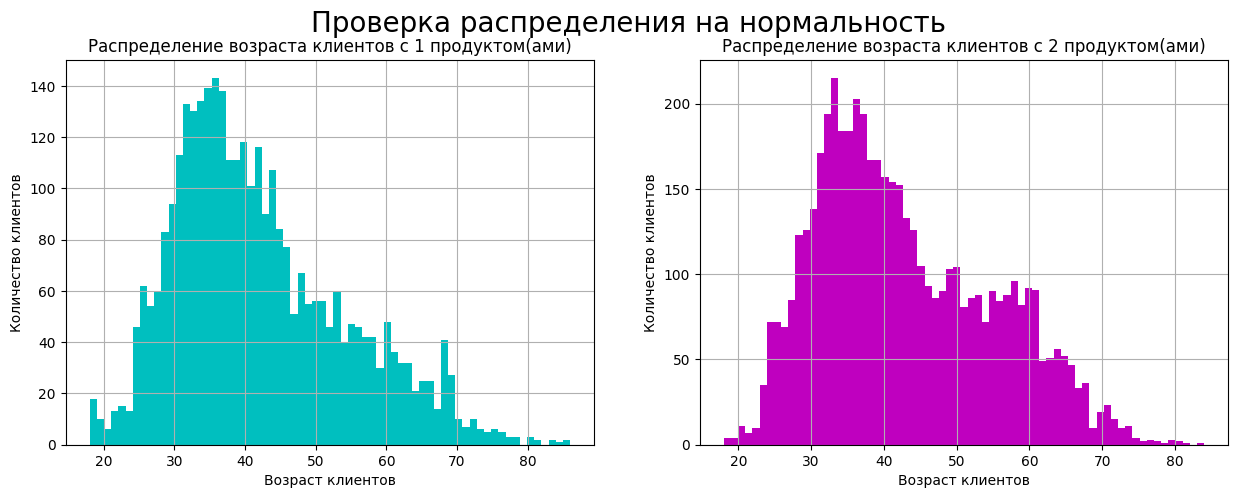

In [62]:
# Построим гистограммы возраста для двух выборок
# Зададим исходные данные для построения графиков в словаре: ключи - это номера графиков, значения - кол-во продуктов у 
# клиентов и цвет баров гистограммы
query_dict = {0: [1, 'c'], 1: [2, 'm']}

# Создаем несколько графиков с помощью функции subplots, в fig записываем кол-во областей, 
# где будем создавать графики (1 область), в axs записываем кол-во графиков (2 гистограммы - распределение возраста 
# клиентов, имеющих один и два продукта)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

# Общий заголовок для всех графиков
fig.suptitle('Проверка распределения на нормальность',\
            fontsize = 20)

# Фильтруем данные, строим гистограммы, задаем заголовки и сетку 
for key,value in query_dict.items():
    fd = data.query('products == @value[0]')['age']
    axs[key].hist(fd, bins = 67, color = value[1])
    axs[key].set_title(f'Распределение возраста клиентов с {value[0]} продуктом(ами)')
    axs[key].grid()

# Задаем подписи осей для каждой гистограммы    
for subplot in axs:
    subplot.set_xlabel("Возраст клиентов")
    subplot.set_ylabel("Количество клиентов")
    plt.grid(True)

plt.show()

**Комментарии:** визуально видно, что распределение возрастов для двух выборок клиентов не очень похоже на нормальное. Проведем проверку наших гипотез для нормальности распределения с помощью критерия Шапиро-Уилка: 

In [63]:
# Проверяем данные двух выборок на нормальность

# Подготовим две выборки
first_sample = list(data.query('products == 1')['age'])
second_sample = list(data.query('products == 2')['age'])

# Зададим уровень статистической значимости
alpha = 0.05

# Рассчитаем p-value для двух выборок с помощью критерия Шапиро-Уилка
results_1 = stats.shapiro(first_sample)
results_2 = stats.shapiro(second_sample)

p_value_1 = results_1[1]
p_value_2 = results_2[1]

# Узнаем значения выборок
print(f'Размер выборки 1 составляет {len(first_sample)} значений, а размер выборки 2 - {len(second_sample)} значений.')

# Проверим наши распределения на нормальность
for i in [p_value_1, p_value_2]:
    print('p-значение: ', i)
    if i < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

Размер выборки 1 составляет 3323 значений, а размер выборки 2 - 5119 значений.
p-значение:  2.7809143816725107e-30
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  7.941429186486062e-35
Отвергаем нулевую гипотезу: распределение не нормально


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


В процессе проверки распределения на нормальность у нас возникло две проблемы:
- выборка возраста для клиентов с двумя продуктами составила 5119 человек (критерий Шапиро-Уилка будет давать некорректные результаты при размерах выборки более 5000 значений);
- проверка распределения значения возраста на нормальность для выборки клиентов с одним продуктом провалилась - возраст распределен ненормально. 

Исходя из этого для сравнения средних возрастов выберем U критерий Манна-Уитни. 

In [64]:
# Рассчитаем различие средних возрастов клиентов из выборок с помощью U критерия Манна-Уитни 
results = stats.mannwhitneyu(first_sample, second_sample)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница средних возрастов статистически значима.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии средних возрастов сделать нельзя.'
    ) 

p-значение:  0.057138410813417605
Не получилось отвергнуть нулевую гипотезу, вывод о различии средних возрастов сделать нельзя.


#### Гипотеза №2

Исходя из задач исследования нам интересно узнать самую отточную группу клиентов. В соответствии с пожеланиями заказчика исследования и результатам сегментации у нас есть две таких группы:
- клиенты с тремя и более продуктами и `средним уровнем стоимости активов`: численность 423, из них ушло 33.3%;
- клиенты с тремя и более продуктами и `высоким уровнем стоимости активов`: численность 864, из них ушло 43.8%.

Попробуем подтвердить, что сегмент клиентов с тремя и более продуктами и высоким уровнем стоимости активов является самым отточным и полученные результаты не являются погрешностью вычислений в процессе исследования - сформулируем наши гипотезы:

- Нулевая (Н0): доля отточных клиентов с тремя и более продуктами и `средним уровнем стоимости активов` **равна** доле отточных клиентов с тремя и более продуктами и `высоким уровнем стоимости активов`;
- Альтернативная (Н1): доля отточных клиентов с тремя и более продуктами и `средним уровнем стоимости активов` **не равна** доле отточных клиентов с тремя и более продуктами и `высоким уровнем стоимости активов`.

У нас есть два сегмента (независимые, несвязанные выборки) из общего кол-ва клиентов банка (генеральной совокупности). В качестве признака, по которым будем сравнивать эти выборки, примем доли отточных клиентов между группами. Для проверки разницы между долями выборок ГС используем z-критерий двух пропорций, который не учитывает кол-во клиентов в сегментах.

In [65]:
# Подготовим две выборки для расчетов
first_sample_share = data.query('products_category == "три и более продуктов" and\
                                 equity_category == "средний уровень стоимости активов"')
second_sample_share = data.query('products_category == "три и более продуктов" and\
                                 equity_category == "высокий уровень стоимости активов"')

# Посчитаем кол-во отточных клиентов и общее кол-во клиентов в наших сегментах
outflow_group_1 = first_sample_share.query('churn == 1').shape[0]
total_group_1 = first_sample_share.shape[0]
outflow_group_2 = second_sample_share.query('churn == 1').shape[0]
total_group_2 = second_sample_share.shape[0]

# Доля отточных клиентов в первой группе:
p1 = outflow_group_1/total_group_1

# Доля отточных клиентов в первой группе:
p2 = outflow_group_2/total_group_2

# Доля отточных клиентов в комбинированном датасете:
p_combined = (outflow_group_1 + outflow_group_2) / (total_group_1 + total_group_2)

# Разница пропорций в датасетах
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_group_1 + 1/total_group_2))

# Задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print(f'Отвергаем нулевую гипотезу: не удалось доказать равенство между долями отточных клиентов групп "три и более \
продуктов и средний уровень стоимости активов" и "три и более продуктов и высокий уровень стоимости активов"')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли отточных клиентов групп "три и\
более продуктов и средний уровень стоимости активов" и "три и более продуктов и высокий уровень стоимости активов"\
разными')

p-значение:  0.000345792130175937
Отвергаем нулевую гипотезу: не удалось доказать равенство между долями отточных клиентов групп "три и более продуктов и средний уровень стоимости активов" и "три и более продуктов и высокий уровень стоимости активов"


## Выводы по результатам исследования и рекомендации для заказчика

**Общая информация по исследовательскому анализу:**
- наш датасет содержит данные о 9974 уникальных клиентах. Из них 5875 (59%) проживают в Ярославле, 2683 (27%) - в Рыбинске и 1416 (14%) - в Ростове;
- общая доля клиентов со средним и хорошим скорингом (в диапазоне 765-950) составляет 85.7%, что является хорошим показателем качества базы клиентов; 
- 5119 клиентов имеют один продукт, 3323 клиента - два продукта;
- медианный возраст клиента банка - 40 лет;
- средний процент оттока клиентов из банка составляет 18.2%;
- у оттока пользователей самая сильная связь была с кол-вом продуктов (products) и уровнем оценки стоимости активов клиентов (equity) - именно по этим параметрам была проведена сегментация.

**Ответы на ключевые вопросы, поставленные в качестве задачи исследования:**
- `клиенты были поделены по следующим категориям (в итоге получилось 12 сегментов):`
    - по количеству продуктов: "один продукт", "два продукта", "три и более продуктов" (банка);
    - по уровню оценки стоимости собственности: "низкий уровень стоимости активов", "средний уровень стоимости активов", "высокий уровень стоимости активов" и "VIP-клиенты";
- построены портреты типичного отточного/действующего клиента для каждого сегмента, проведено сравнение со средним значением оттока клиентов в банке;
- `самыми отточными и одновременно крупными сегментами являются:`
    - клиенты с двумя продуктами и высоким уровнем стоимости активов: численность 2314, из них ушло 24.4%;
    - клиенты с тремя и более продуктами и средним уровнем стоимости активов: численность 423, из них ушло 33.3%;
    - клиенты с тремя и более продуктами и высоким уровнем стоимости активов: численность 864, из них ушло 43.8%;
- подтверждение того, что последний сегмент является одним из самых отточных (не учитывая VIP-клиентов), было проведено с помощью проверки статистической гипотезы на равенство долей.

**Дополнительная информация по сегментации:**
- `Также есть сегменты VIP-клиентов, которые не многочисленны (сегменты менее 500 человек), но могут быть интересны отделу маркетинга:`
    - клиенты с одним продуктом и уровнем стоимости активов "VIP-клиенты": численность 46, из них ушло 30.4%;
    - клиенты с двумя продуктами и уровнем стоимости активов "VIP-клиенты": численность 137, из них ушло 33.6%;
    - клиенты с тремя и более продуктами и уровнем стоимости активов "VIP-клиенты": численность 88, из них ушло 54.5%.

- `Следующие сегменты клиентов имеют низкий отток (ниже 10%):`
    - клиенты с двумя продуктами и низким уровнем стоимости активов: численность 972, из них ушло 9.3%;
    - клиенты с одним продуктом и низким уровнем стоимости активов: численность 2214, из них ушло 2.4%.
    
**Рекомендации к полученным сегментам:**
Т.к. у нас есть корреляция между кол-вом используемых продуктов и оценкой стоимости активов и оттоком, то можно предложить следующие варианты по его снижению:
- **Кол-во используемых продуктов:**
    - произвести их укрупнение - например объединить дебетовую и кредитную карту в одну карту с набором функций (для повышения удобства использования). Или объединить доступ к расчетному счету с депозитом - на остаток на р/с начислять %, чтобы у клиента не было необходимости отдельно открывать вклад;
    - у банка просто отсутствует продукт, который можно предложить этому сегменту клиентов (VIP они уже перепробовали все, что было, но не нашли то, что им необходимо). Необходимо активнее внедрять новые продукты, которые в разработке. А в идеальной ситуации узнать у ушедших клиентов, почему они ушли и каких продуктов им не хватало.
- **Оценка стоимости активов**: тут многое зависит от того, чем занимается наш клиент:
    - `затруднен доступ к финансовым средствам:` если клиент - предприниматель и у него высокий уровень баланса и размер активов - упростить доступ к его денежным средствам, сделать переводы денег и оплату счетов быстрее и интуитивно понятнее (т.е. провести эксперимент: дать человеку, далекому от банковских операций, оплатить счет, выставленный контрагентом - это должно быть так просто, чтобы даже ребенок мог с этим справиться);
    - `низкая доходность:` внедрить прогрессивный % на вклады и на остатки по счету, кешбэки в зависимости от кол-ва денег на балансе;
    
- **Низкая активность:**
    - на отток клиентов также напрямую влияет их активность. Если посмотреть на портреты клиентов из отточных сегментов, то будет очевидно, что большая часть клиентов там - неактивные (активными они становятся после того, как совершают действие по расторжению договора). Поэтому необходимо повысить общую активность клиентов. В частности, поработать над улучшением мобильного приложения и взаимодействием с продуктами (обзвон клиентов воспринимается плохо, а посещения офисов редкие - большинство вопросов опять же можно решить через приложение). Например, на главном экране приложения сделать обзор всех продуктов, которые на данный момент есть у клиента (карты, кредиты, вклады и т.п.). Улучшить взаимодействие с ними: например, досрочная оплата по ипотеке должна быть интуитивно понятной, желательно в 2-3 действия; 
    - Еще из интересного опыта повышения активности: использовать маркетплейсы банка, а получение товаров в отделениях, у операторов (при получении товара клиент хочет убедиться, что с товаром все будет в порядке, поэтому большим успехом пользуются пункты выдачи, а не постаматы. По этой же логике клиент выбирает получение посылки в отделении банка у оператора, а не в постамате - в данном случае активность клиента уже повышается). При получении товара предлагать какие-то недорогие услуги (например подписка на музыку или доставку еды с кешбэком), которые оформляются в рамках 5-10 минут, после чего клиент сможет начать пользоваться этим продуктом и приносить банку деньги.
    